## **Filmes(2015 a 2019) - Apresentação dos Dados**

 Esse dataset mostra a  participação dos filmes nacionais nos cinemas brasileiros e a sua relação com os filmes estrangeiros, bem como o acesso ao cinema pela população.


**Data Dictionary**

| Variable | Definition                                 | Key                                            | Notes                                                                                                                                       |
|----------|--------------------------------------------|------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------|
| Ano de exibição      |      Ano de exibição                                   |                              |    2015-2019                                                                                                                                         |
| Título da obra	   | Nome do filme                               |                       |                                                               |
| Gênero      | Categoria do filme                                        |                                                |                                                                                                                                             |
| País(es) produtor(es) da obra      | País criador do filme                                |                                                |                                                         |
| Nacionalidade da obra    | Identidade cultural do filme|                                                |                  Brasileiro = Brasil, Estrangeiro = Inglaterra, Estados Unidos, etc
| Empresa distribuidora    | Empresa criadora do filme |                                                |  |
| Origem da empresa distribuidora   | Nacionalidade da empresa criadora do filme                             |                             |   Distribuição Nacional = Brasileira, Distribuição Internacional = Estrangeira, Codistribuição Internacional-Nacional = Brasileira e Estrangeira                                                                                                                                    
| Público no ano de exibição     | Público                             |                                                |                                                                                                                                             |
| Renda (R$) no ano de exibição    | Renda                               |                                                |                                                                                                                                             |




**Data Dictionary**

In [69]:
import numpy as np
import pandas as pd
# from google.colab import drive

import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib.ticker import MaxNLocator
import random
from statistics import mean
import seaborn as sns
from matplotlib_venn import venn2
import warnings


In [2]:
# drive.mount('/content/drive')

In [3]:
# filmes = pd.read_csv('/content/drive/MyDrive/dados/Listagem_dos_Filmes_2009_a_2019.csv')

In [4]:
filmes = pd.read_csv('Listagem_dos_Filmes_2009_a_2019.csv')

In [5]:
filmes = filmes[filmes['Ano de exibição'] >= 2015].drop_duplicates().drop(columns='Unnamed: 0')
colunas = filmes.columns.str.strip().tolist()
filmes.columns=colunas
filmes

Ano de exibição              Título da obra        Gênero  \
0                2019   120 Batimentos Por Minuto        Ficção   
1                2019                     3 Faces        Ficção   
2                2019            45 Dias Sem Você        Ficção   
3                2019    A 100 Passos De Um Sonho        Ficção   
4                2019  A Abelhinha Maya - O Filme      Animação   
...               ...                         ...           ...   
3643             2015        Êxodo: Deuses e Reis        Ficção   
3644             2015                       Ídolo  Documentário   
3645             2015          Órfãos do Eldorado        Ficção   
3646             2015       Última Viagem a Vegas        Ficção   
3647             2015           Últimas Conversas  Documentário   

             País(es) produtor(es) da obra Nacionalidade da obra  \
0                                   França           Estrangeira   
1                                      Irã           Estrangeira   
2                                   Brasil            Brasileira   
3                           Estados Unidos           Estrangeira   
4                                 Alemanha           Estrangeira   
...                                    ...                   ...   
3643  Espanha, Estados Unidos, Reino Unido           Estrangeira   
3644                                Brasil            Brasileira   
3645                                Brasil            Brasileira   
3646                        Estados Unidos           Estrangeira   
3647                                Brasil            Brasileira   

          Empresa distribuidora Origem da empresa distribuidora  \
0                     Imovision           Distribuição Nacional   
1                     Imovision           Distribuição Nacional   
2                       O2 Play           Distribuição Nacional   
3                        Disney      Distribuição Internacional   
4                      Playarte           Distribuição Nacional   
...                         ...                             ...   
3643                        Fox      Distribuição Internacional   
3644        Nossa Distribuidora           Distribuição Nacional   
3645                   Downtown           Distribuição Nacional   
3646                      Paris           Distribuição Nacional   
3647  Espaço Filmes/Videofilmes           Distribuição Nacional   

      Público no ano de exibição  Renda (R$) no ano de exibição  
0                           10.0                          70.00  
1                         6289.0                      103805.00  
2                         3303.0                       31295.00  
3                           69.0                        4186.00  
4                          402.0                        3531.00  
...                          ...                            ...  
3643                   2612034.0                    39245069.00  
3644                       606.0                        7543.39  
3645                      2983.0                       37453.58  
3646                       173.0                        1476.00  
3647                     14498.0                      187626.54  

[3648 rows x 9 columns]

In [6]:
filmes.describe()

Ano de exibição  Público no ano de exibição  \
count      3648.000000                3.648000e+03   
mean       2016.919408                2.403642e+05   
std           1.418116                1.042262e+06   
min        2015.000000                0.000000e+00   
25%        2016.000000                2.477500e+02   
50%        2017.000000                2.747000e+03   
75%        2018.000000                2.791625e+04   
max        2019.000000                1.965647e+07   

       Renda (R$) no ano de exibição  
count                   3.648000e+03  
mean                    3.534919e+06  
std                     1.563345e+07  
min                     0.000000e+00  
25%                     2.666250e+03  
50%                     3.492119e+04  
75%                     4.302305e+05  
max                     3.386249e+08

In [7]:
filmes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3648 entries, 0 to 3647
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ano de exibição                  3648 non-null   int64  
 1   Título da obra                   3648 non-null   object 
 2   Gênero                           3648 non-null   object 
 3   País(es) produtor(es) da obra    3648 non-null   object 
 4   Nacionalidade da obra            3648 non-null   object 
 5   Empresa distribuidora            3648 non-null   object 
 6   Origem da empresa distribuidora  3648 non-null   object 
 7   Público no ano de exibição       3648 non-null   float64
 8   Renda (R$) no ano de exibição    3648 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 285.0+ KB


## **Probabilidade Simples**

Aqui podemos observar que alguns filmes possuem mais de um país produtor. Iremos usar inicialmente os filmes que possuem apenas um país de origem.

In [8]:
filmes['País(es) produtor(es) da obra'].value_counts().head(5)

País(es) produtor(es) da obra
Brasil             1016
Estados Unidos     1006
França              271
Bélgica, França      61
Reino Unido          59
Name: count, dtype: int64

Qual a probabilidade de selecionar um filme e esse filme ter tido produção da obra apenas no Estados Unidos, Brasil, França e Inglaterra entre 2015 e 2019 no cinema brasileiro?

In [9]:
probS = len(filmes[filmes['País(es) produtor(es) da obra'] == 'Brasil'])/len(filmes)
probS1 = len(filmes[filmes['País(es) produtor(es) da obra'] == 'Estados Unidos'])/len(filmes)
probS2 = len(filmes[filmes['País(es) produtor(es) da obra'] == 'França'])/len(filmes)
probS3 = len(filmes[filmes['País(es) produtor(es) da obra'] == 'Reino Unido'])/len(filmes)
probS4 = 1.0 - (probS + probS1 + probS2 + probS3)

print(f'A probabilidade de selecionar um filme apenas de nacionalidade brasileira é de: {round(probS*100,2)}%.')
print(f'A probabilidade de selecionar um filme apenas de nacionalidade americana é de: {round(probS1*100,2)}%.')
print(f'A probabilidade de selecionar um filme apenas de nacionalidade francesa é de: {round(probS2*100,2)}%.')
print(f'A probabilidade de selecionar um filme apenas de nacionalidade inglesa é de: {round(probS3*100,2)}%.')
print(f'A probabilidade de selecionar o resto dos filmes é de: {round(probS4*100,2)}%.')

A probabilidade de selecionar um filme apenas de nacionalidade brasileira é de: 27.85%.
A probabilidade de selecionar um filme apenas de nacionalidade americana é de: 27.58%.
A probabilidade de selecionar um filme apenas de nacionalidade francesa é de: 7.43%.
A probabilidade de selecionar um filme apenas de nacionalidade inglesa é de: 1.62%.
A probabilidade de selecionar o resto dos filmes é de: 35.53%.


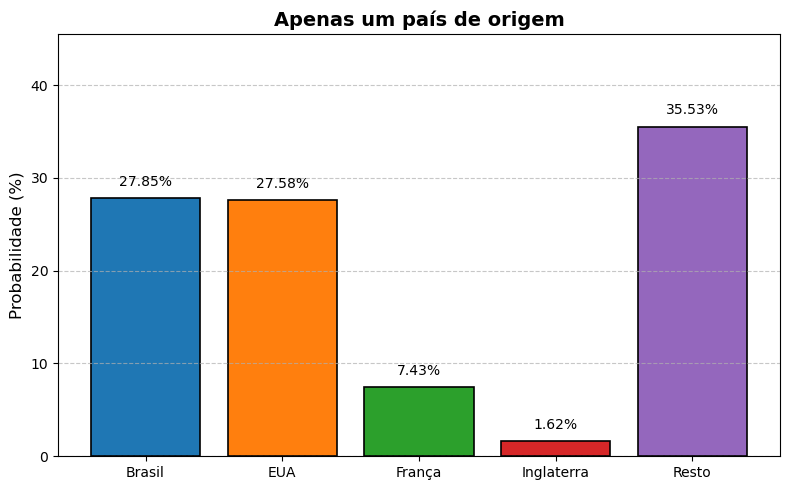

In [10]:
graf1 = [round(probS * 100, 2), round(probS1 * 100, 2), round(probS2 * 100, 2), round(probS3 * 100, 2), round(probS4 * 100, 2)]
countries = ['Brasil', 'EUA','França', 'Inglaterra', 'Resto']

plt.figure(figsize=(8, 5))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  
plt.bar(countries, graf1, color=colors, edgecolor='black', linewidth=1.2)

for i, value in enumerate(graf1):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

plt.title('Apenas um país de origem', fontsize=14, fontweight='bold')
plt.ylabel('Probabilidade (%)', fontsize=12)

# Personalizar o grid e os eixos
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(graf1) + 10)  

plt.tight_layout()

plt.show()

In [11]:
filmes[~filmes['País(es) produtor(es) da obra'].
       str.contains(',', na=False)]['País(es) produtor(es) da obra'].value_counts().head(10)

País(es) produtor(es) da obra
Brasil            1016
Estados Unidos    1006
França             271
Reino Unido         59
Itália              43
Japão               36
Espanha             35
Inglaterra          32
Alemanha            32
Argentina           31
Name: count, dtype: int64

De acordo com o gráfico e a contagem de valores em cada país incluímos apenas os 5 primeiros países com produção única por terem probabilidades maiores em relação ao resto dos filmes, com destaque para **Brasil** e **EUA**.

### Produção 100% em países ou dividido com outro

In [12]:
print(len(filmes['País(es) produtor(es) da obra'].value_counts()))
filmes['País(es) produtor(es) da obra'].value_counts().head(40)

366


País(es) produtor(es) da obra
Brasil                                 1016
Estados Unidos                         1006
França                                  271
Bélgica, França                          61
Reino Unido                              59
Estados Unidos, Reino Unido              47
Itália                                   43
Japão                                    36
França, Itália                           35
Espanha                                  35
Alemanha                                 32
Inglaterra                               32
Argentina                                31
Suécia                                   27
Argentina, Brasil                        25
Rússia                                   23
Alemanha, França                         21
Coréia do Sul                            19
Argentina, Espanha                       17
Austrália, Estados Unidos                14
China, Estados Unidos                    13
Estados Unidos, França                   12
Ca

In [13]:
probS_2 = len(filmes[filmes['País(es) produtor(es) da obra'].str.contains('Estados Unidos', na=False)])/len(filmes)
probS_21 = len(filmes[filmes['País(es) produtor(es) da obra'].str.contains('Brasil', na=False)])/len(filmes)
probS_22 = len(filmes[filmes['País(es) produtor(es) da obra'].str.contains('França', na=False)])/len(filmes)
probS_23 = len(filmes[filmes['País(es) produtor(es) da obra'].str.contains('Reino Unido', na=False)])/len(filmes)
probS_24 = len(filmes[filmes['País(es) produtor(es) da obra'].str.contains('Bélgica', na=False)])/len(filmes)
probS_25 = len(filmes[filmes['País(es) produtor(es) da obra'].str.contains('Itália', na=False)])/len(filmes)
probS_26 = len(filmes[filmes['País(es) produtor(es) da obra'].str.contains('Japão', na=False)])/len(filmes)

print('A probabilidade de selecionar um país com filme produzido 100% nele ou divido com outro país:')
print(f'Nacionalidade americana: {round(probS_2*100,2)}%.')
print(f'Nacionalidade brasileira: {round(probS_21*100,2)}%.')
print(f'Nacionalidade francesa: {round(probS_22*100,2)}%.')
print(f'Nacionalidade inglesa: {round(probS_23*100,2)}%.')
print(f'Nacionalidade belga: {round(probS_24*100,2)}%.')
print(f'Nacionalidade italiana: {round(probS_25*100,2)}%.')
print(f'Nacionalidade japonesa: {round(probS_26*100,2)}%.')

A probabilidade de selecionar um país com filme produzido 100% nele ou divido com outro país:
Nacionalidade americana: 34.29%.
Nacionalidade brasileira: 32.24%.
Nacionalidade francesa: 19.19%.
Nacionalidade inglesa: 5.04%.
Nacionalidade belga: 3.73%.
Nacionalidade italiana: 3.29%.
Nacionalidade japonesa: 1.73%.


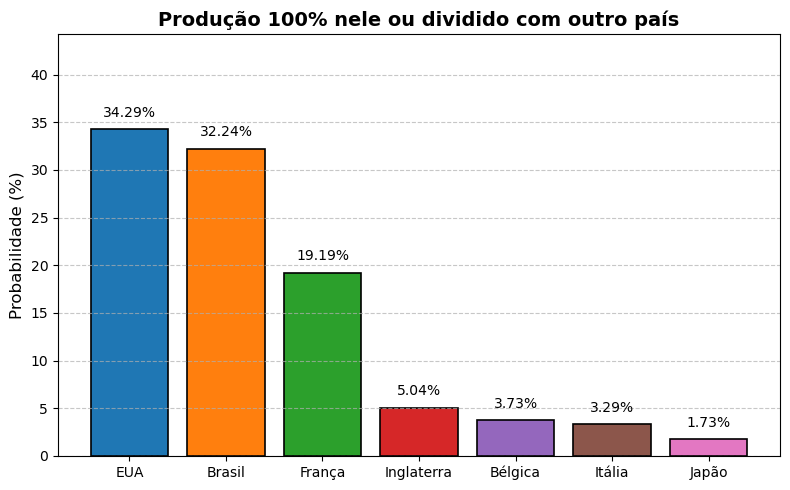

In [14]:
graf2 = [round(probS_2*100,2), round(probS_21*100,2), round(probS_22*100,2), round(probS_23*100,2),
         round(probS_24*100,2),round(probS_25*100,2),round(probS_26*100,2)]
countries2 = ['EUA','Brasil', 'França', 'Inglaterra', 'Bélgica', 'Itália', 'Japão']

plt.figure(figsize=(8, 5))

colors2 = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
plt.bar(countries2, graf2, color=colors2, edgecolor='black', linewidth=1.2)

for i, value in enumerate(graf2):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

plt.title('Produção 100% nele ou dividido com outro país', fontsize=14, fontweight='bold')
plt.ylabel('Probabilidade (%)', fontsize=12)

# Personalizar o grid e os eixos
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(graf2) + 10)  

plt.tight_layout()

plt.show()

* Os EUA e Brasil continuam liderando na produção de filmes, com EUA tendo mais relevância agora.
* França e Inglaterra seguem na mesma ordem.
* A Bélgica se destaca pela produção de filmes em colaboração com outros países, ganhando relevância.
* Já a Itália, embora ainda mantenha destaque, perdeu posição para a Bélgica.



## Comparativos externos:

Estamos com dados das produções criadas nos EUA e Brasil que foram distribuídos no Brasil. Em análise de fontes externas (https://www.the-numbers.com/movies/production-countries/#tab=year), embora a fonte aponte a dificuldade de informações de produções estrangeiras podemos verificar a que pelo menos 6.251 filmes foram produzidos nos EUA e quantidade levantada, pela fonte, de filmes produzidos no Brasil, soma apenas 263.

Concluímos que ainda é um número muito pequeno de produções norte-americas distribuídas no Brasil (cerca de 16%), bem como a informação de produções de filmes brasileiros ainda é dificultada, ou seja, nesta fonte apenas 25% foram listadas.  

## **Probabilidade da União**

Quais probabilidades de terem tido alguma participação brasileira ou estrangeira na criação do filme?

In [15]:
probUni = len(filmes[(filmes['Nacionalidade da obra'] == 'Estrangeira') |
 (filmes['Origem da empresa distribuidora'] == 'Distribuição Internacional')])/len(filmes)
probUni1 = len(filmes[(filmes['Nacionalidade da obra'] == 'Brasileira') |
 (filmes['Origem da empresa distribuidora'] == 'Distribuição Nacional')])/len(filmes)

print(f"A probabilidade do filme ter tido alguma participação estrangeira é de: {round(probUni*100,2)}%.")
print(f"A probabilidade do filme ter tido alguma participação brasileira é de: {round(probUni1*100,2)}%.")

# filmes com produção no Brasil mais outro é considerado Brasileiro

A probabilidade do filme ter tido alguma participação estrangeira é de: 69.19%.
A probabilidade do filme ter tido alguma participação brasileira é de: 79.74%.


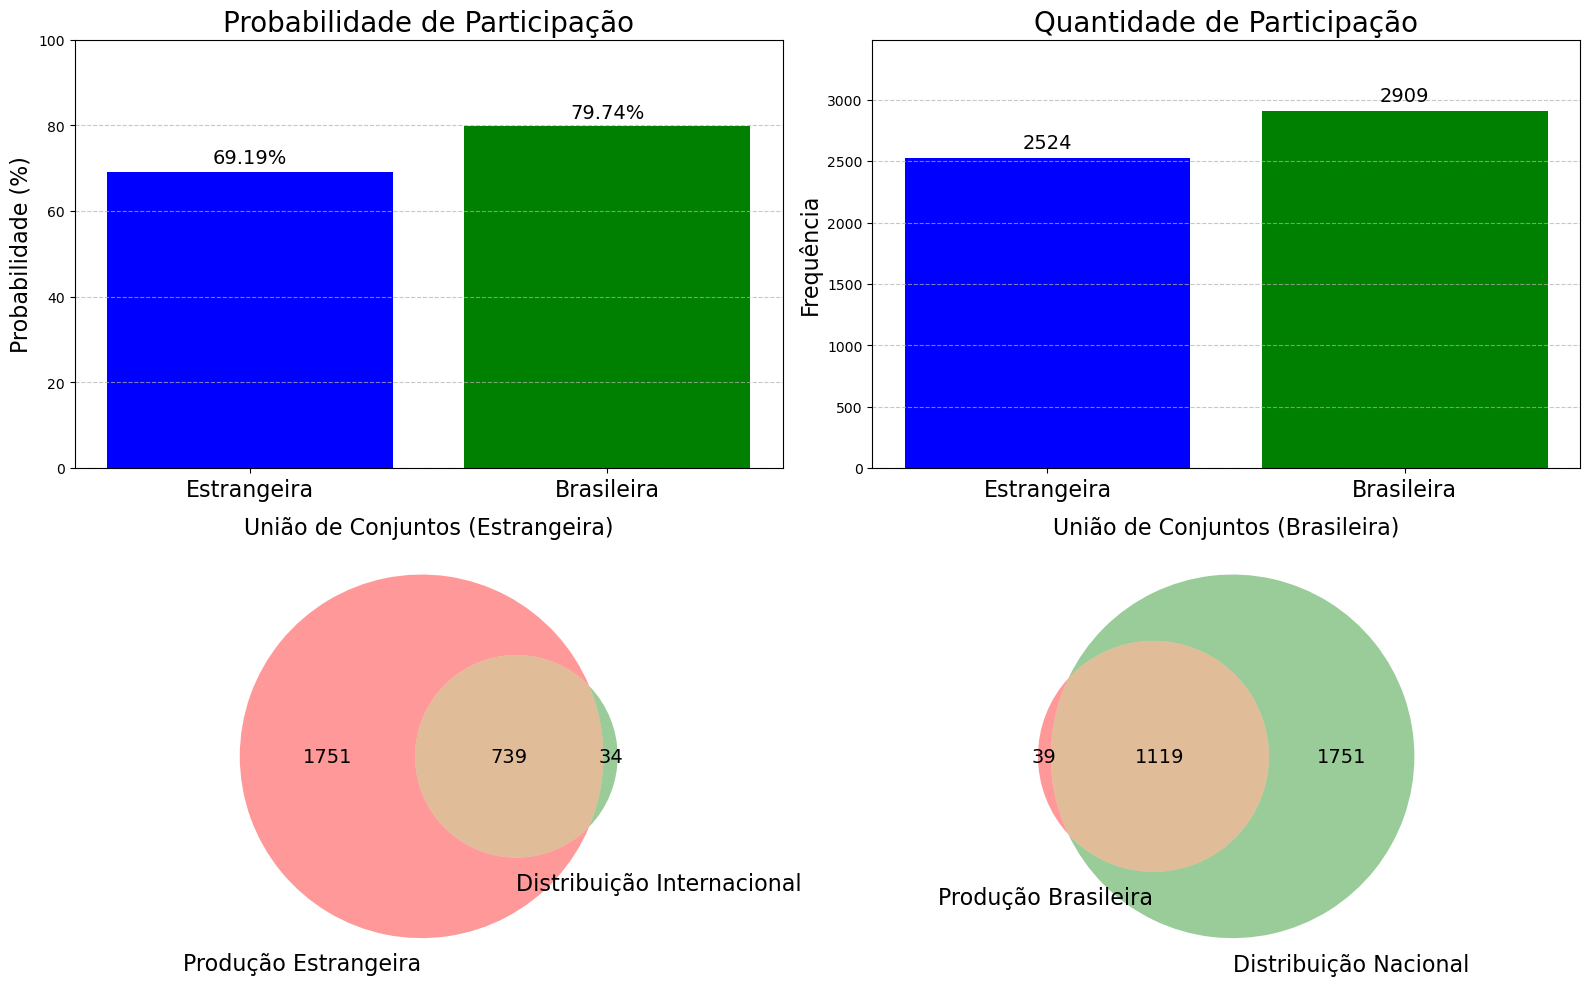

In [16]:
# Dados
probUni = len(filmes[(filmes['Nacionalidade da obra'] == 'Estrangeira') |
                     (filmes['Origem da empresa distribuidora'] == 'Distribuição Internacional')]) / len(filmes)
probUni1 = len(filmes[(filmes['Nacionalidade da obra'] == 'Brasileira') |
                      (filmes['Origem da empresa distribuidora'] == 'Distribuição Nacional')]) / len(filmes)
quant1 = len(filmes[(filmes['Nacionalidade da obra'] == 'Estrangeira') |
                     (filmes['Origem da empresa distribuidora'] == 'Distribuição Internacional')])
quant2 = len(filmes[(filmes['Nacionalidade da obra'] == 'Brasileira') |
                      (filmes['Origem da empresa distribuidora'] == 'Distribuição Nacional')])

conjunto1 = filmes[filmes['Nacionalidade da obra'] == 'Estrangeira']
conjunto2 = filmes[filmes['Origem da empresa distribuidora'] == 'Distribuição Internacional']

tam_intersecao = len(filmes[(filmes['Nacionalidade da obra'] == 'Estrangeira') & 
    (filmes['Origem da empresa distribuidora'] == 'Distribuição Internacional')])
tam_conjunto1 = len(conjunto1) - tam_intersecao
tam_conjunto2 = len(conjunto2) - tam_intersecao

conjunto3 = filmes[filmes['Nacionalidade da obra'] == 'Brasileira']
conjunto4 = filmes[filmes['Origem da empresa distribuidora'] == 'Distribuição Nacional']

tam_intersecao1 = len(filmes[(filmes['Nacionalidade da obra'] == 'Brasileira') & 
    (filmes['Origem da empresa distribuidora'] == 'Distribuição Nacional')])
tam_conjunto3 = len(conjunto3) - tam_intersecao1
tam_conjunto4 = len(conjunto4) - tam_intersecao1

# Labels e valores
labels = ['Estrangeira', 'Brasileira']
valores = [probUni * 100, probUni1 * 100]
quantidades = [quant1, quant2]

# Configurar a figura com subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))  # Figura maior para acomodar 4 subplots

# Gráfico de Barras - Probabilidade
axes[0, 0].bar(labels, valores, color=['blue', 'green'])
axes[0, 0].set_title('Probabilidade de Participação', fontsize=20)
axes[0, 0].set_ylabel('Probabilidade (%)', fontsize=16)
axes[0, 0].tick_params(axis='x', labelsize=16)
axes[0, 0].set_ylim(0, 100)
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(valores):
    axes[0, 0].text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=14)

# Gráfico de Barras - Quantidade
axes[0, 1].bar(labels, quantidades, color=['blue', 'green'])
axes[0, 1].set_title('Quantidade de Participação', fontsize=20)
axes[0, 1].set_ylabel('Frequência', fontsize=16)
axes[0, 1].tick_params(axis='x', labelsize=16)
axes[0, 1].set_ylim(0, max(quantidades) * 1.2)  # Escala baseada no valor máximo
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(quantidades):
    axes[0, 1].text(i, value + 50, f'{value}', ha='center', va='bottom', fontsize=14)

# Diagrama de Venn - Produção Estrangeira e Distribuição Internacional
venn_1 = venn2(
    subsets=(tam_conjunto1, tam_conjunto2, tam_intersecao),
    set_labels=('Produção Estrangeira', 'Distribuição Internacional'),
    ax=axes[1, 0]
)
axes[1, 0].set_title("União de Conjuntos (Estrangeira)", fontsize=16)
for text in venn_1.set_labels:
    text.set_fontsize(16)
for text in venn_1.subset_labels:
    if text:
        text.set_fontsize(14)

# Diagrama de Venn - Produção Brasileira e Distribuição Nacional
venn_2 = venn2(
    subsets=(tam_conjunto3, tam_conjunto4, tam_intersecao1),
    set_labels=('Produção Brasileira', 'Distribuição Nacional'),
    ax=axes[1, 1]
)
axes[1, 1].set_title("União de Conjuntos (Brasileira)", fontsize=16)
for text in venn_2.set_labels:
    text.set_fontsize(16)
for text in venn_2.subset_labels:
    if text:
        text.set_fontsize(14)

plt.tight_layout()
plt.show()

* De acordo com o gráfico de barras, observa-se que a participação do Brasil nos filmes é maior do que a de países estrangeiros.
* Analisando os diagramas de Venn, verifica-se que há mais filmes com produção estrangeira do que aqueles distribuídos internacionalmente.
* Por outro lado, o número de filmes de distribuições nacionais supera o número de produções brasileiras.
* Além disso, a interseção entre produção e distribuição nacional é mais significativa do que entre produção e distribuição estrangeira.

## **Probabilidade da Intersecção**

Qual a probabilidade do filme ter tido produção no Estados Unidos e participação do Brasil na empresa distribuidora?

Qual a probabilidade do filme ter tido produção no Brasil e participação internacional na empresa distribuidora?

Qual a probabilidade do filme ter tido produção no Estados Unidos e participação internacional na empresa distribuidora?

Qual a probabilidade do filme ter tido produção no Brasil e participação do Brasil na empresa distribuidora?

In [17]:
probInt = len(filmes[(filmes['País(es) produtor(es) da obra'] == 'Estados Unidos') &
                     (filmes['Origem da empresa distribuidora'] == 'Distribuição Nacional')])/len(filmes)
probInt1 = len(filmes[(filmes['País(es) produtor(es) da obra'] == 'Brasil') &
                     (filmes['Origem da empresa distribuidora'] == 'Distribuição Internacional')])/len(filmes)
probInt2 = len(filmes[(filmes['País(es) produtor(es) da obra'] == 'Estados Unidos') &
                     (filmes['Origem da empresa distribuidora'] == 'Distribuição Internacional')])/len(filmes)
probInt3 = len(filmes[(filmes['País(es) produtor(es) da obra'] == 'Brasil') &
                     (filmes['Origem da empresa distribuidora'] == 'Distribuição Nacional')])/len(filmes)

print(f"A probabilidade do filme ter tido produção no EUA e empresa distribuidora brasileira é de: {round(probInt*100,2)}%.")
print(f"A probabilidade do filme ter tido produção no Brasil e empresa distribuidora internacional é de: {round(probInt1*100,2)}%.")
print(f"A probabilidade do filme ter tido produção no EUA e empresa distribuidora internacional é de: {round(probInt2*100,2)}%.")
print(f"A probabilidade do filme ter tido produção no Brasil e empresa distribuidora brasileira é de: {round(probInt3*100,2)}%.")

A probabilidade do filme ter tido produção no EUA e empresa distribuidora brasileira é de: 11.1%.
A probabilidade do filme ter tido produção no Brasil e empresa distribuidora internacional é de: 0.88%.
A probabilidade do filme ter tido produção no EUA e empresa distribuidora internacional é de: 16.47%.
A probabilidade do filme ter tido produção no Brasil e empresa distribuidora brasileira é de: 26.86%.


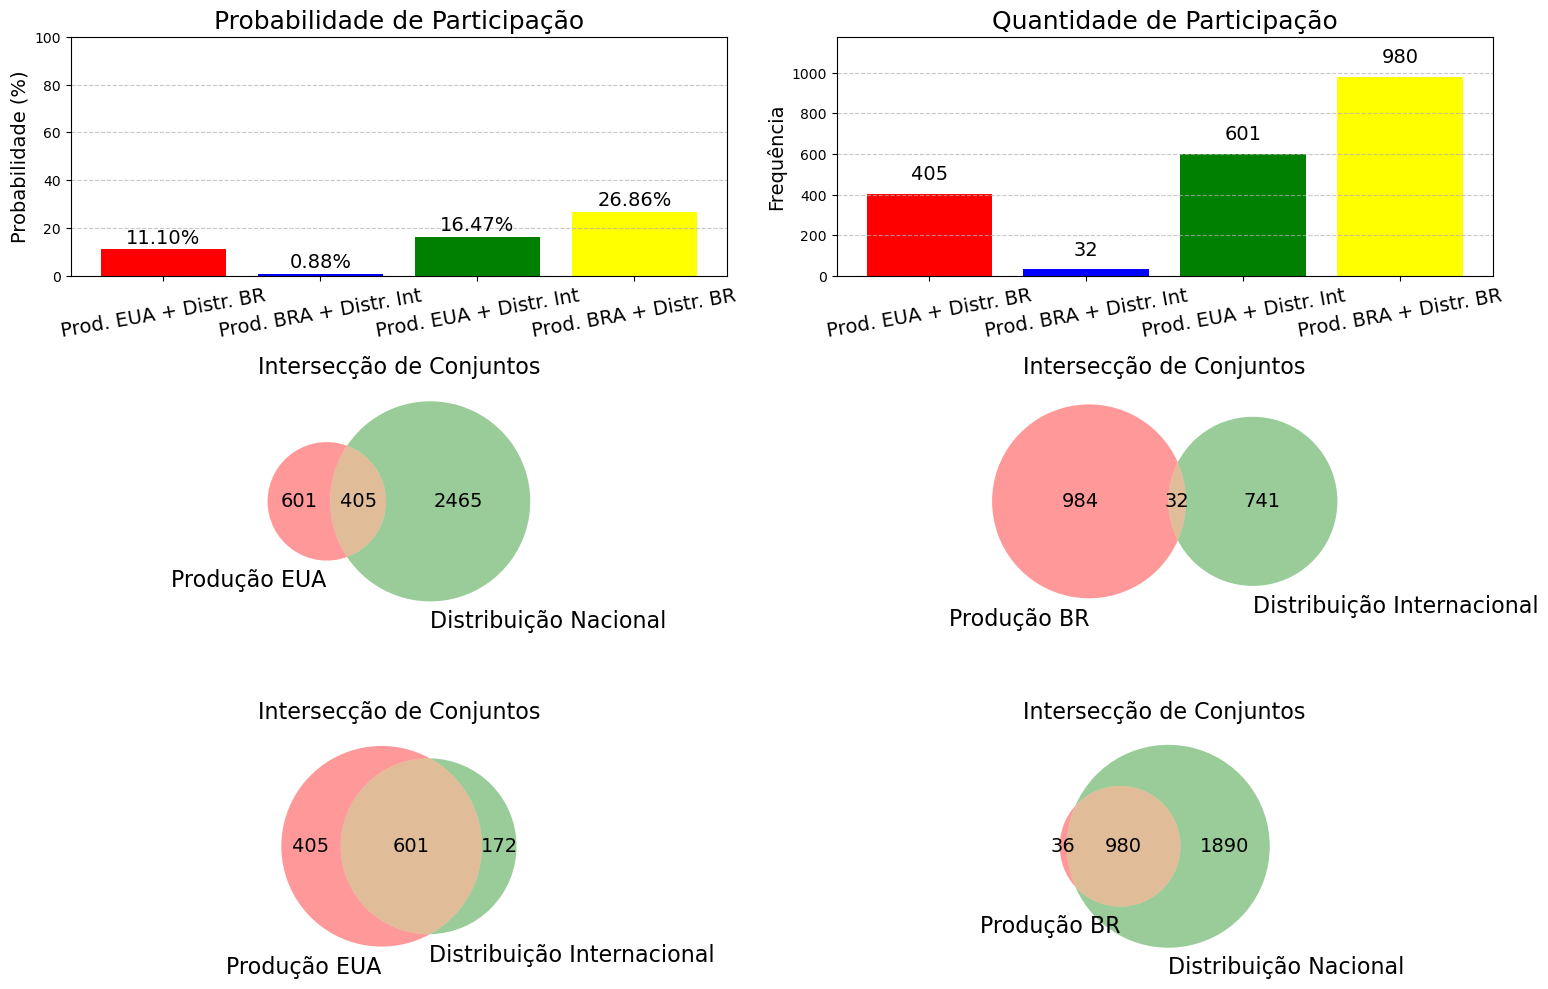

Existe a opção de Codistribuição Internacional-Nacinal também que abrange 0.14% dos filmes.
Uma porcentagem bem baixa.


In [18]:
quant1 = len(filmes[(filmes['País(es) produtor(es) da obra'] == 'Estados Unidos') &
                     (filmes['Origem da empresa distribuidora'] == 'Distribuição Nacional')])
quant2 = len(filmes[(filmes['País(es) produtor(es) da obra'] == 'Brasil') &
                     (filmes['Origem da empresa distribuidora'] == 'Distribuição Internacional')])
quant3 = len(filmes[(filmes['País(es) produtor(es) da obra'] == 'Estados Unidos') &
                     (filmes['Origem da empresa distribuidora'] == 'Distribuição Internacional')])
quant4 = len(filmes[(filmes['País(es) produtor(es) da obra'] == 'Brasil') &
                     (filmes['Origem da empresa distribuidora'] == 'Distribuição Nacional')])

conjunto1 = filmes[filmes['País(es) produtor(es) da obra'] == 'Estados Unidos']
conjunto2 = filmes[filmes['Origem da empresa distribuidora'] == 'Distribuição Nacional']

tam_intersecao = len(filmes[(filmes['País(es) produtor(es) da obra'] == 'Estados Unidos') & 
    (filmes['Origem da empresa distribuidora'] == 'Distribuição Nacional')])
tam_conjunto1 = len(conjunto1) - tam_intersecao
tam_conjunto2 = len(conjunto2) - tam_intersecao


conjunto3 = filmes[filmes['País(es) produtor(es) da obra'] == 'Brasil']
conjunto4 = filmes[filmes['Origem da empresa distribuidora'] == 'Distribuição Internacional']

tam_intersecao1 = len(filmes[(filmes['País(es) produtor(es) da obra'] == 'Brasil') & 
    (filmes['Origem da empresa distribuidora'] == 'Distribuição Internacional')])
tam_conjunto3 = len(conjunto3) - tam_intersecao1
tam_conjunto4 = len(conjunto4) - tam_intersecao1


conjunto5 = filmes[filmes['País(es) produtor(es) da obra'] == 'Estados Unidos']
conjunto6 = filmes[filmes['Origem da empresa distribuidora'] == 'Distribuição Internacional']

tam_intersecao2 = len(filmes[(filmes['País(es) produtor(es) da obra'] == 'Estados Unidos') & 
    (filmes['Origem da empresa distribuidora'] == 'Distribuição Internacional')])
tam_conjunto5 = len(conjunto5) - tam_intersecao2
tam_conjunto6 = len(conjunto6) - tam_intersecao2


conjunto7 = filmes[filmes['País(es) produtor(es) da obra'] == 'Brasil']
conjunto8 = filmes[filmes['Origem da empresa distribuidora'] == 'Distribuição Nacional']

tam_intersecao3 = len(filmes[(filmes['País(es) produtor(es) da obra'] == 'Brasil') & 
    (filmes['Origem da empresa distribuidora'] == 'Distribuição Nacional')])
tam_conjunto7 = len(conjunto7) - tam_intersecao3
tam_conjunto8 = len(conjunto8) - tam_intersecao3

# Labels e valores
labels = ['Prod. EUA + Distr. BR', 'Prod. BRA + Distr. Int', 'Prod. EUA + Distr. Int', 'Prod. BRA + Distr. BR',]
valores = [probInt * 100, probInt1 * 100, probInt2 * 100, probInt3 * 100]
quantidades = [quant1, quant2, quant3, quant4]

fig, axes = plt.subplots(3, 2, figsize=(16, 10))  

# Gráfico de Barras - Probabilidade
axes[0, 0].bar(labels, valores, color=['red', 'blue','green','yellow'])
axes[0, 0].set_title('Probabilidade de Participação', fontsize=18)
axes[0, 0].set_ylabel('Probabilidade (%)', fontsize=14)
axes[0, 0].tick_params(axis='x', labelsize=14, labelrotation=10)
axes[0, 0].set_ylim(0, 100)
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(valores):
    axes[0, 0].text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=14)

# Gráfico de Barras - Quantidade
axes[0, 1].bar(labels, quantidades, color=['red', 'blue','green','yellow'])
axes[0, 1].set_title('Quantidade de Participação', fontsize=18)
axes[0, 1].set_ylabel('Frequência', fontsize=14)
axes[0, 1].tick_params(axis='x', labelsize=14, labelrotation=10)
axes[0, 1].set_ylim(0, max(quantidades) * 1.2)  # Escala baseada no valor máximo
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(quantidades):
    axes[0, 1].text(i, value + 50, f'{value}', ha='center', va='bottom', fontsize=14)

# Diagrama de Venn 1
venn_1 = venn2(
    subsets=(tam_conjunto1, tam_conjunto2, tam_intersecao),
    set_labels=('Produção EUA', 'Distribuição Nacional'),
    ax=axes[1, 0]
)
axes[1, 0].set_title("Intersecção de Conjuntos", fontsize=16)
for text in venn_1.set_labels:
    text.set_fontsize(16)
for text in venn_1.subset_labels:
    if text:
        text.set_fontsize(14)

# Diagrama de Venn 2 
venn_2 = venn2(
    subsets=(tam_conjunto3, tam_conjunto4, tam_intersecao1),
    set_labels=('Produção BR', 'Distribuição Internacional'),
    ax=axes[1, 1]
)
axes[1, 1].set_title("Intersecção de Conjuntos", fontsize=16)
for text in venn_2.set_labels:
    text.set_fontsize(16)
for text in venn_2.subset_labels:
    if text:
        text.set_fontsize(14)
        
# Diagrama de Venn 3         
venn_3 = venn2(
    subsets=(tam_conjunto5, tam_conjunto6, tam_intersecao2),
    set_labels=('Produção EUA', 'Distribuição Internacional'),
    ax=axes[2, 0]
)
axes[2, 0].set_title("Intersecção de Conjuntos", fontsize=16)
for text in venn_3.set_labels:
    text.set_fontsize(16)
for text in venn_3.subset_labels:
    if text:
        text.set_fontsize(14)

# Diagrama de Venn 4         
venn_4 = venn2(
    subsets=(tam_conjunto7, tam_conjunto8, tam_intersecao3),
    set_labels=('Produção BR', 'Distribuição Nacional'),
    ax=axes[2, 1]
)
axes[2, 1].set_title("Intersecção de Conjuntos", fontsize=16)
for text in venn_4.set_labels:
    text.set_fontsize(16)
for text in venn_4.subset_labels:
    if text:
        text.set_fontsize(14)

plt.tight_layout()
plt.show()

cin = len(filmes[filmes['Origem da empresa distribuidora'] == 'Codistribuição Internacional-Nacional'])/len(filmes)
print(f"Existe a opção de Codistribuição Internacional-Nacinal também que abrange {cin*100:.2f}% dos filmes.")
print("Uma porcentagem bem baixa.")

## **Probabilidade de Complemento**

Qual a probabilidade do filme ter tido produção 100% no Estados Unidos e não participação do Brasil na empresa distribuidora?

Qual a probabilidade do filme ter tido produção 100% no Brasil e não participação na empresa distribuidora?

In [19]:
probCom = probS1 - probInt
probCom2 = probS - probInt3

print(f"A probabilidade do filme ter tido produção 100% no EUA e empresa distribuidora não ter sido brasileira é de: {round(probCom*100,2)}%.")
print(f"A probabilidade do filme ter tido produção 100% no Brasil e empresa distribuidora não ter sido brasileira é de: {round(probCom2*100,2)}%.")

A probabilidade do filme ter tido produção 100% no EUA e empresa distribuidora não ter sido brasileira é de: 16.47%.
A probabilidade do filme ter tido produção 100% no Brasil e empresa distribuidora não ter sido brasileira é de: 0.99%.


## **Probabilidade da Diferença**

Qual a probabilidade do filme ter tido participação do Brasil na sua produção e não ter empresa distribuidora nacional?

Qual a probabilidade do filme ter tido participação do Brasil na sua produção e não ser da Codistribuição Internacional-Nacinal a empresa distribuidora?

In [20]:
probDif = len(filmes[(filmes['Nacionalidade da obra'] == 'Brasileira') &
 (filmes['Origem da empresa distribuidora'] != 'Distribuição Nacional')])/ len(filmes)
probDif1 = len(filmes[(filmes['Nacionalidade da obra'] == 'Brasileira') &
 (filmes['Origem da empresa distribuidora'] != 'Distribuição Internacional')])/ len(filmes)
probDif2 = len(filmes[(filmes['Nacionalidade da obra'] == 'Brasileira') &
 (filmes['Origem da empresa distribuidora'] != 'Codistribuição Internacional-Nacional')])/ len(filmes)


print(f"A probabilidade do filme ter tido participação brasileira na produção e não ter empresa distribuidora nacional é de {round(probDif * 100, 2)}%.")
print(f"A probabilidade do filme ter tido participação brasileira na produção  e ter empresa distribuidora nacional é de {round(probDif1 * 100, 2)}%.")
print(f"A probabilidade do filme ter tido participação brasileira na produção  e não ser da Codistribuição Internacional-Nacinal a empresa distribuidora é de {round(probDif2 * 100, 2)}%.")

A probabilidade do filme ter tido participação brasileira na produção e não ter empresa distribuidora nacional é de 1.07%.
A probabilidade do filme ter tido participação brasileira na produção  e ter empresa distribuidora nacional é de 30.81%.
A probabilidade do filme ter tido participação brasileira na produção  e não ser da Codistribuição Internacional-Nacinal a empresa distribuidora é de 31.61%.


## **Probabilidade Condicional**

Qual a probabilidade de ter distribuidora do Brasil sabendo que a produção foi do EUA?

In [21]:
probCond=probInt/probS

print(f"A probabilidade do filme ter sido de uma distribuidora do Brasil sabendo que a produção foi do EUA é de: {round(probCond*100,2)}%")

A probabilidade do filme ter sido de uma distribuidora do Brasil sabendo que a produção foi do EUA é de: 39.86%


## **Teorema de Bayes**

Qual a probabilidade da produção ter sido do EUA tal que a empresa distribuidora foi do Brasil?

In [22]:
probB = len(filmes[filmes['Origem da empresa distribuidora'] == 'Distribuição Nacional'])/len(filmes)

probBayes = (probCond*(probS))/probB

print(f"A probabilidade da produção ter sido do EUA tal que a empresa distribuidora foi do Brasil é de: {round(probBayes*100,2)}%.")

A probabilidade da produção ter sido do EUA tal que a empresa distribuidora foi do Brasil é de: 14.11%.


## **Variáveis Aleatórias Discretas**

Selecionaremos a variável referente ao **Ano de exibição** para análises das variáveis discretas, pois podemos distinguir com mais detalhes as características dos filmes em cada ano.

In [23]:
# Ano de exibição
filmes['Ano de exibição'].value_counts()

Ano de exibição
2015    794
2016    767
2018    707
2017    703
2019    677
Name: count, dtype: int64

### **Função de Probabilidade**

In [24]:
# Ano de exibição
fp = (filmes['Ano de exibição'].value_counts()/len(filmes)).sort_index()
print(fp)

Ano de exibição
2015    0.217654
2016    0.210252
2017    0.192708
2018    0.193805
2019    0.185581
Name: count, dtype: float64


### **Função Repartição**

In [25]:
# Ano de exibição
fp.cumsum()

Ano de exibição
2015    0.217654
2016    0.427906
2017    0.620614
2018    0.814419
2019    1.000000
Name: count, dtype: float64

### **Gráfico Simples**

#### Função de Probabilidade

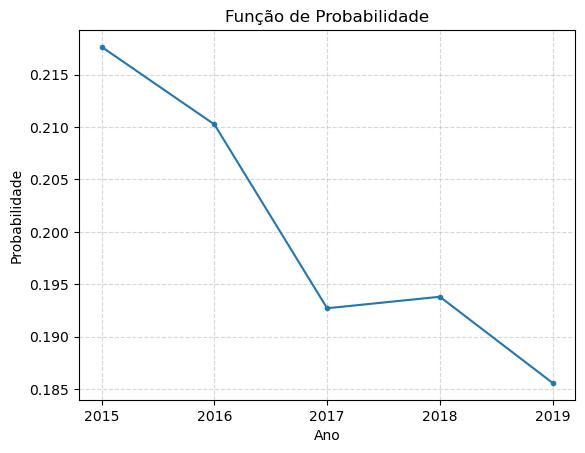

In [26]:
# Ano de exibição
plt.figure()
plt.plot(fp, '.-')

plt.xticks([2015,2016,2017,2018,2019])

plt.title('Função de Probabilidade')
plt.ylabel('Probabilidade')
plt.xlabel('Ano')
plt.grid(True, linestyle='--', alpha=0.5)


plt.show()

* O gráfico acima mostra que, ao longo dos anos, houve uma diminuição na quantidade de filmes, com exceção do período de 2017-2018, em que ocorreu um leve aumento na distribuição de probabilidade.

A seguir, serão apresentados histogramas detalhados para cada ano, limitando o público a até 100.000 pessoas e a renda a até 100.000 reais. Esse recorte tem como objetivo apresentar as distribuições de forma mais clara e compreensível, já que as distribuições gerais contêm muitos valores discrepantes, tornando os gráficos difíceis de interpretar.

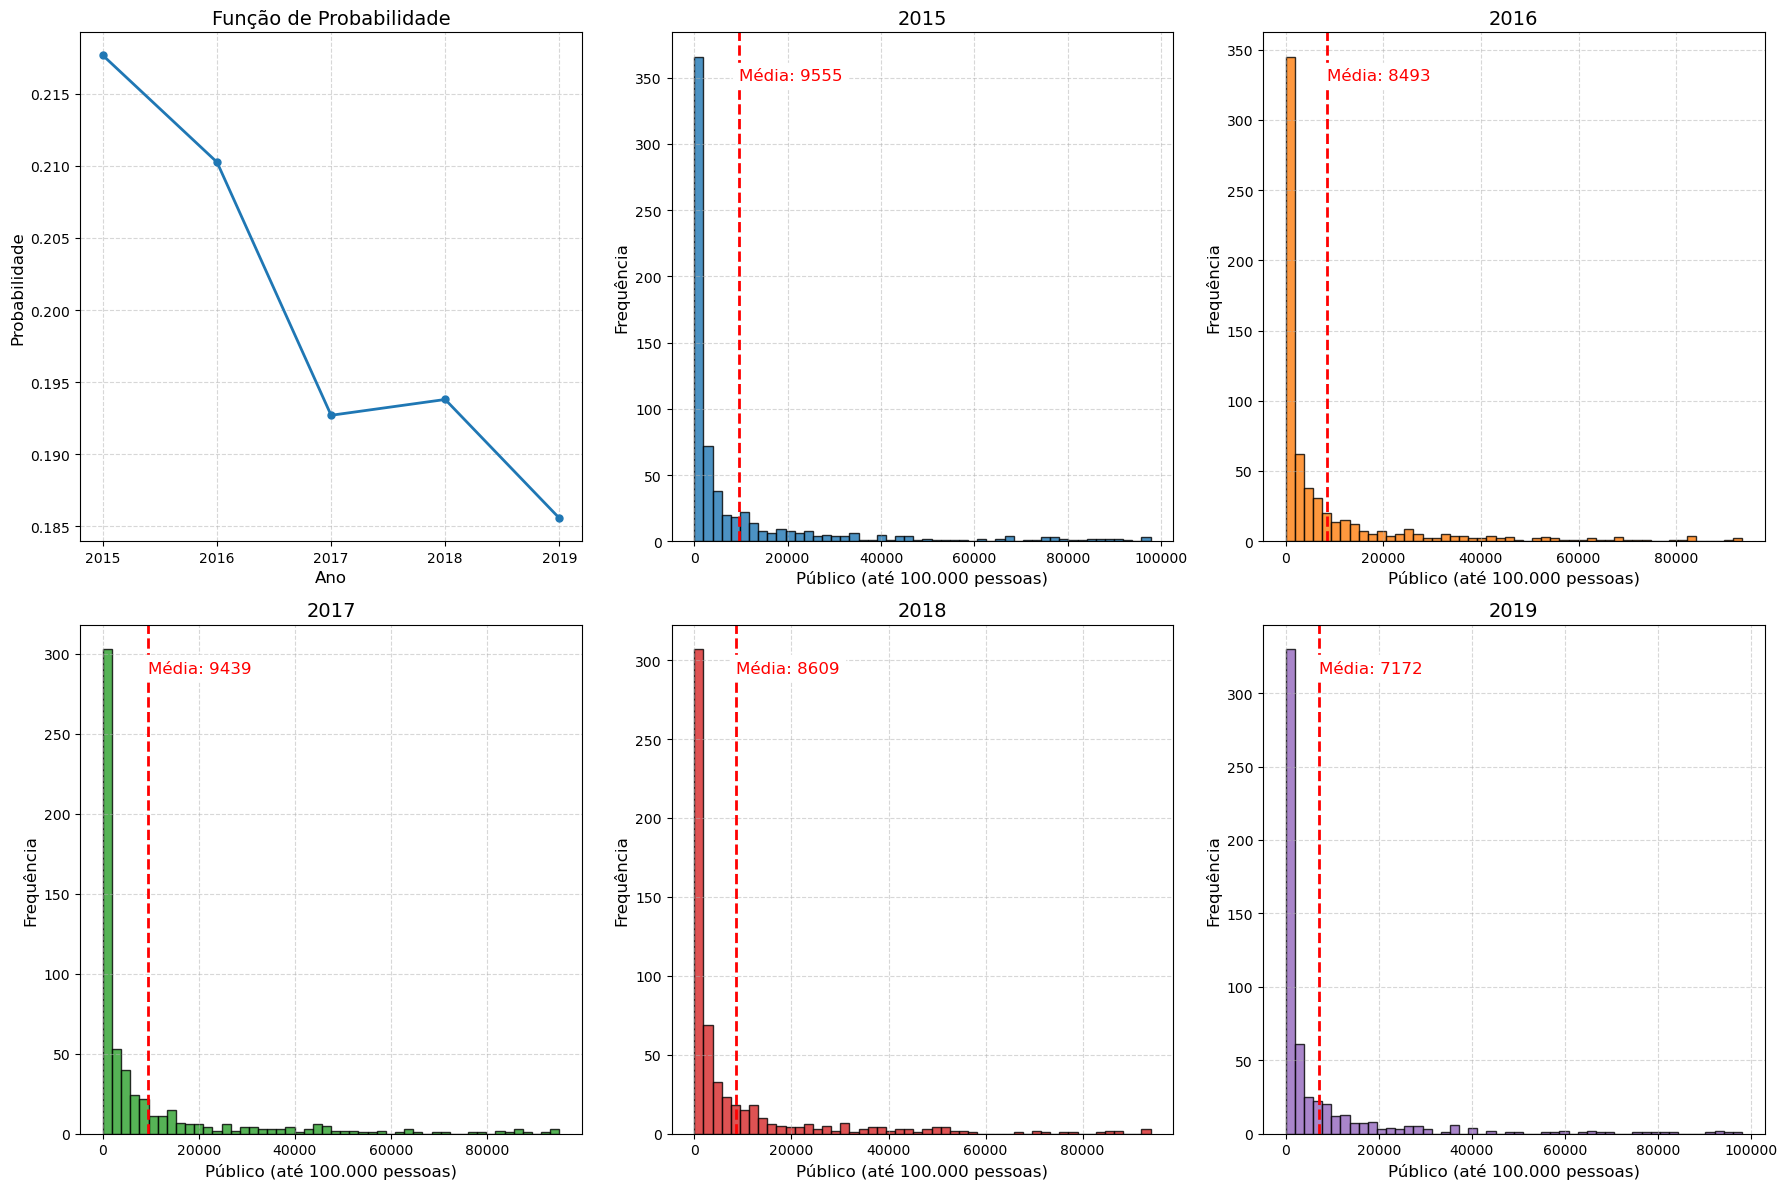

In [27]:
gs1 = filmes[(filmes['Ano de exibição']==2015) & (filmes['Público no ano de exibição']<100000)]['Público no ano de exibição']
gs2 = filmes[(filmes['Ano de exibição']==2016) & (filmes['Público no ano de exibição']<100000)]['Público no ano de exibição']
gs3 = filmes[(filmes['Ano de exibição']==2017) & (filmes['Público no ano de exibição']<100000)]['Público no ano de exibição']
gs4 = filmes[(filmes['Ano de exibição']==2018) & (filmes['Público no ano de exibição']<100000)]['Público no ano de exibição']
gs5 = filmes[(filmes['Ano de exibição']==2019) & (filmes['Público no ano de exibição']<100000)]['Público no ano de exibição']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))  

# Ajuste de cores e estilo
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  

# Gráfico 1: Função de probabilidade
axes[0, 0].plot(fp, '.-', color=colors[0], markersize=10, linewidth=2)
axes[0, 0].set_xticks([2015, 2016, 2017, 2018, 2019])
axes[0, 0].set_xticklabels([2015, 2016, 2017, 2018, 2019], fontsize=10)
axes[0, 0].set_title('Função de Probabilidade', fontsize=14)
axes[0, 0].set_ylabel('Probabilidade', fontsize=12)
axes[0, 0].set_xlabel('Ano', fontsize=12)
axes[0, 0].grid(True, linestyle='--', alpha=0.5)

# Histogramas para cada ano
anos = [2015, 2016, 2017, 2018, 2019]
datasets = [gs1, gs2, gs3, gs4, gs5]

for i, (ax, ano, data, color) in enumerate(zip(axes.flat[1:], anos, datasets, colors)):
    ax.hist(data, bins=50, color=color, alpha=0.8, edgecolor='black')
    ax.set_title(f'{ano}', fontsize=14)
    ax.set_ylabel('Frequência', fontsize=12)
    ax.set_xlabel('Público (até 100.000 pessoas)', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)
    
    
    media = data.mean() 
    ax.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Média: {media:.0f}')  
    ax.text(
        media, ax.get_ylim()[1] * 0.9,  
        f'Média: {media:.0f}', 
        color='red', fontsize=12, ha='left', va='bottom', backgroundcolor='white'
    )

plt.tight_layout()
plt.show()

* De acordo com os histogramas, todos os anos seguiram uma ordem consistente na relação entre quantidade de filmes e médias de público, com exceção de 2017. Nesse ano, a média de público foi maior do que em 2016 e 2018, apesar desses dois anos terem apresentado maior quantidade de filmes. É possível que, em 2017, a qualidade média dos filmes tenha sido superior.

* Observa-se também que, em 2019, houve um pico relacionado a um baixo público, em comparação com os outros anos, apesar de esse ano apresentar uma menor quantidade de público total. Isso pode indicar que a qualidade média dos filmes em 2019 foi inferior.

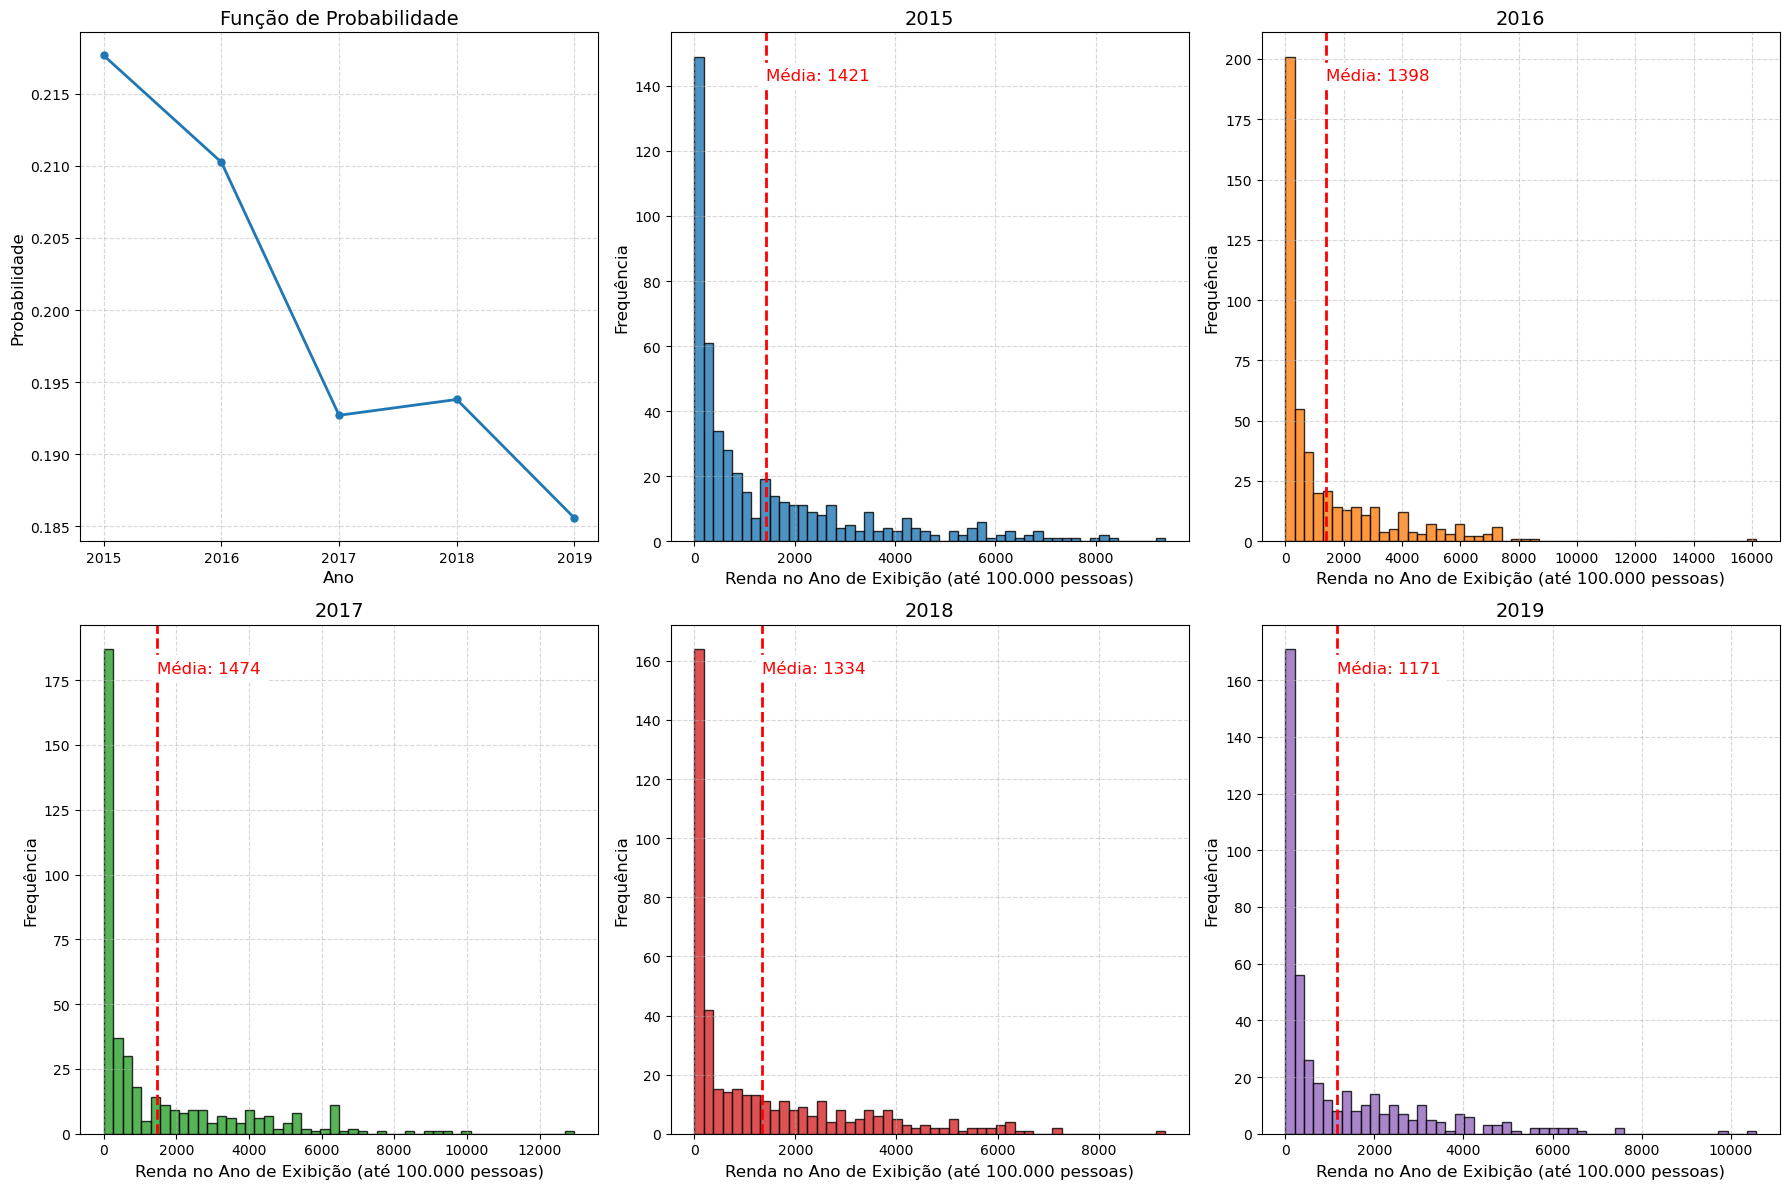

In [28]:
gs1 = filmes[(filmes['Ano de exibição']==2015) & (filmes['Renda (R$) no ano de exibição']<100000)]['Público no ano de exibição']
gs2 = filmes[(filmes['Ano de exibição']==2016) & (filmes['Renda (R$) no ano de exibição']<100000)]['Público no ano de exibição']
gs3 = filmes[(filmes['Ano de exibição']==2017) & (filmes['Renda (R$) no ano de exibição']<100000)]['Público no ano de exibição']
gs4 = filmes[(filmes['Ano de exibição']==2018) & (filmes['Renda (R$) no ano de exibição']<100000)]['Público no ano de exibição']
gs5 = filmes[(filmes['Ano de exibição']==2019) & (filmes['Renda (R$) no ano de exibição']<100000)]['Público no ano de exibição']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Aumentado o tamanho da figura

# Ajuste de cores e estilo
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Cores personalizadas

# Gráfico 2: Função de probabilidade
axes[0, 0].plot(fp, '.-', color=colors[0], markersize=10, linewidth=2)
axes[0, 0].set_xticks([2015, 2016, 2017, 2018, 2019])
axes[0, 0].set_xticklabels([2015, 2016, 2017, 2018, 2019], fontsize=10)
axes[0, 0].set_title('Função de Probabilidade', fontsize=14)
axes[0, 0].set_ylabel('Probabilidade', fontsize=12)
axes[0, 0].set_xlabel('Ano', fontsize=12)
axes[0, 0].grid(True, linestyle='--', alpha=0.5)

# Histogramas para cada ano
anos = [2015, 2016, 2017, 2018, 2019]
datasets = [gs1, gs2, gs3, gs4, gs5]

for i, (ax, ano, data, color) in enumerate(zip(axes.flat[1:], anos, datasets, colors)):
    ax.hist(data, bins=50, color=color, alpha=0.8, edgecolor='black')
    ax.set_title(f'{ano}', fontsize=14)
    ax.set_ylabel('Frequência', fontsize=12)
    ax.set_xlabel('Renda no Ano de Exibição (até 100.000 pessoas)', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)
    
    
    media = data.mean()  # Calcula a média do conjunto de dados
    ax.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Média: {media:.0f}') 
    ax.text(
        media, ax.get_ylim()[1] * 0.9,  
        f'Média: {media:.0f}', 
        color='red', fontsize=12, ha='left', va='bottom', backgroundcolor='white'
    )

plt.tight_layout()
plt.show()

* Em relação às rendas no ano de exibição, os histogramas mostram que todos mostram uma proporção em relação à média e quantidade de filmes, com exceção de 2017 onde a média da renda é maior que todos os anos. Como avaliado no público, os filmes nesse ano podem ter tido uma qualidade maior.

* Em 2016, embora tenha a terceira maior média de renda, foi o ano que teve maior pico referente à baixa renda.No gráfico sobre o público, a média foi bem abaixo também em relação as proporções de decrescimento das quantidades de filmes. Provavelmente, esse ano os filmes tiveram baixa qualidade.

* Em 2019, a média da renda foi muito baixa, assim como a média do público no ano de exibição, o que se cria a hipótese de filmes de baixa qualidade.

#### Função Repartição

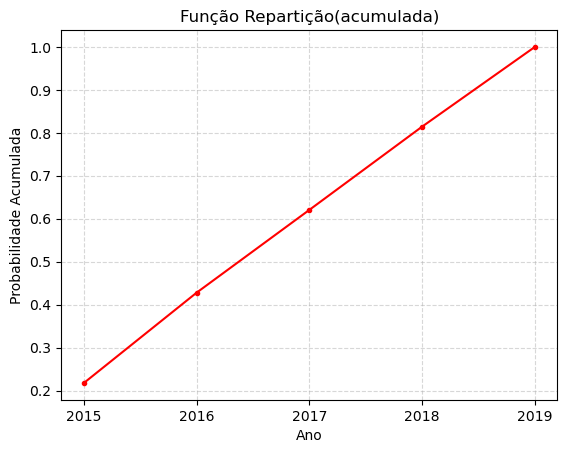

In [29]:
# Ano de exibição
plt.figure()
plt.plot(fp.cumsum(), '.-', color='red')

plt.xticks([2015,2016,2017,2018,2019])

plt.title('Função Repartição(acumulada)')
plt.ylabel('Probabilidade Acumulada')
plt.xlabel('Ano')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

No gráfico de repartição, podemos observar que as variações de probabilidade acumuladas em cada ano são bem parecidas.

## Variáveis Aleatórias Contínuas

In [30]:
filmes['Renda (R$) no ano de exibição'].describe()

count    3.648000e+03
mean     3.534919e+06
std      1.563345e+07
min      0.000000e+00
25%      2.666250e+03
50%      3.492119e+04
75%      4.302305e+05
max      3.386249e+08
Name: Renda (R$) no ano de exibição, dtype: float64

### Função Repartição

In [31]:
fmin = filmes['Renda (R$) no ano de exibição'].min() # valor mínimo
fmax = filmes['Renda (R$) no ano de exibição'].max() # valor máximo

fmean = filmes['Renda (R$) no ano de exibição'].mean() # média
fstd = filmes['Renda (R$) no ano de exibição'].std() # desvio padrão

upper_bound1 = len(filmes[filmes['Renda (R$) no ano de exibição'] <= fmean])/len(filmes)
lower_bound1 = len(filmes[filmes['Renda (R$) no ano de exibição'] <= fmean-fstd])/len(filmes)
probability1 = upper_bound1 - lower_bound1

lower_bound2 = len(filmes[filmes['Renda (R$) no ano de exibição'] <= fmean])/len(filmes)
upper_bound2 = len(filmes[filmes['Renda (R$) no ano de exibição'] <= fmean+fstd])/len(filmes)
probability2 = upper_bound2 - lower_bound2

print(f"intervalo 1: [R${fmean-fstd:.1f}, R${fmean:.1f}]")
print(f"A probabilidade dos valores estarem no intervalo da média e "
      f"um desvio padrão abaixo da média é: {probability1*100:.1f}%")
print('----')
print(f"intervalo 2: [R${fmean:.1f}, R${fmean+fstd:.1f}]")
print(f"A probabilidade dos valores estarem no intervalo da média e "
      f"um desvio padrão acima da média é: {probability2*100:.1f}%")

intervalo 1: [R$-12098526.9, R$3534919.3]
A probabilidade dos valores estarem no intervalo da média e um desvio padrão abaixo da média é: 87.7%
----
intervalo 2: [R$3534919.3, R$19168365.5]
A probabilidade dos valores estarem no intervalo da média e um desvio padrão acima da média é: 7.5%


Como o desvio padrão é maior que a média, a subtração da média pelo desvio padrão resultou em um valor negativo, fazendo com que o intervalo 1 abrangesse automaticamente todos os valores abaixo da média.

**OBS**:  No intervalo 1, -12.098.526 reais se refere a 0 reais, já que não existe valor negativo.


In [32]:
# from scipy.stats import norm, expon

# # Parâmetros do intervalo
# lower_bound = 100000  # Limite inferior
# upper_bound = 300000  # Limite superior

# # Parâmetros da distribuição normal (média e desvio padrão dos dados)
# mean = filmes["Renda (R$) no ano de exibição"].mean()
# std = filmes["Renda (R$) no ano de exibição"].std()

# # Calculando a probabilidade do intervalo
# p_lower = expon.pdf(lower_bound, loc=0,scale=1)
# p_upper = expon.pdf(upper_bound,loc=0,scale=1)
# probability =  p_lower - p_upper
# print(f"{probability:.4f}")




In [33]:
fig=px.histogram(filmes, x='Renda (R$) no ano de exibição')

fig.update_layout(
    title="Distribuição da Renda no Ano de Exibição",
    title_x=0.5,
    yaxis_title="Contagem"
)
fig.show()

print(f" A média é: {round(fmean,2)}")
print(f" O desvio padrão é: {round(fstd,2)}")

 A média é: 3534919.32
 O desvio padrão é: 15633446.19


* Como os dados possuem alguns valores discrepantes no sentido direito, a média aumenta muito e o desvio padrão também, além de que no resultado acima os dados a esquerda da média são mais frequentes.

Serão retirados alguns dados discrepantes(**incluídos até R$100.000,00**) para termos uma maior noção do tipo de distribuição da renda no ano de exibição.

In [34]:
# Filtrando os dados para valores de Renda <= 100000
filmes_filtrados = filmes[filmes['Renda (R$) no ano de exibição'] <= 100000]

# Cálculos
fmin = filmes_filtrados['Renda (R$) no ano de exibição'].min()  # valor mínimo
fmax = filmes_filtrados['Renda (R$) no ano de exibição'].max()  # valor máximo

fmean = filmes_filtrados['Renda (R$) no ano de exibição'].mean()  # média
fstd = filmes_filtrados['Renda (R$) no ano de exibição'].std()  # desvio padrão

# Intervalo 1: Média - 1 desvio padrão até a média
upper_bound1 = len(filmes_filtrados[filmes_filtrados['Renda (R$) no ano de exibição'] <= fmean]) / len(filmes_filtrados)
lower_bound1 = len(filmes_filtrados[filmes_filtrados['Renda (R$) no ano de exibição'] <= (fmean - fstd)]) / len(filmes_filtrados)
probability1 = upper_bound1 - lower_bound1

# Intervalo 2: Média até Média + 1 desvio padrão
upper_bound2 = len(filmes_filtrados[filmes_filtrados['Renda (R$) no ano de exibição'] <= (fmean + fstd)]) / len(filmes_filtrados)
lower_bound2 = len(filmes_filtrados[filmes_filtrados['Renda (R$) no ano de exibição'] <= fmean]) / len(filmes_filtrados)
probability2 = upper_bound2 - lower_bound2

# Exibindo os intervalos e as probabilidades
print(f"intervalo 1: [R${fmean - fstd:.1f}, R${fmean:.1f}]")
print(f"A probabilidade dos valores estarem no intervalo da média e "
      f"um desvio padrão abaixo da média é: {probability1 * 100:.1f}%")
print('----')
print(f"intervalo 2: [R${fmean:.1f}, R${fmean + fstd:.1f}]")
print(f"A probabilidade dos valores estarem no intervalo da média e "
      f"um desvio padrão acima da média é: {probability2 * 100:.1f}%")

intervalo 1: [R$-6968.3, R$17048.1]
A probabilidade dos valores estarem no intervalo da média e um desvio padrão abaixo da média é: 68.8%
----
intervalo 2: [R$17048.1, R$41064.5]
A probabilidade dos valores estarem no intervalo da média e um desvio padrão acima da média é: 15.7%


**OBS**: No intervalo 1, -6968.3 reais se refere a 0 reais, já que não existe valor negativo.

In [35]:
fig = px.histogram(filmes_filtrados, x='Renda (R$) no ano de exibição')

fig.add_vline(x=fmean, line=dict(color="red", width=2, dash="dash"), annotation_text="Média", annotation_position="top left")
fig.add_vline(x=fmean - fstd, line=dict(color="blue", width=2, dash="dot"), annotation_text="Média - 1 Desvio Padrão", annotation_position="top left")
fig.add_vline(x=fmean + fstd, line=dict(color="blue", width=2, dash="dot"), annotation_text="Média + 1 Desvio Padrão", annotation_position="top right")

fig.update_layout(
    title="Distribuição da Renda no Ano de Exibição (Até 100.000 R$)",
    title_x=0.5,
    xaxis_title="Renda (R$) no ano de exibição",
    yaxis_title="Contagem"
)
fig.show()

print(f"A média é: {round(fmean, 2)}")
print(f"O desvio padrão é: {round(fstd, 2)}")

A média é: 17048.08
O desvio padrão é: 24016.37


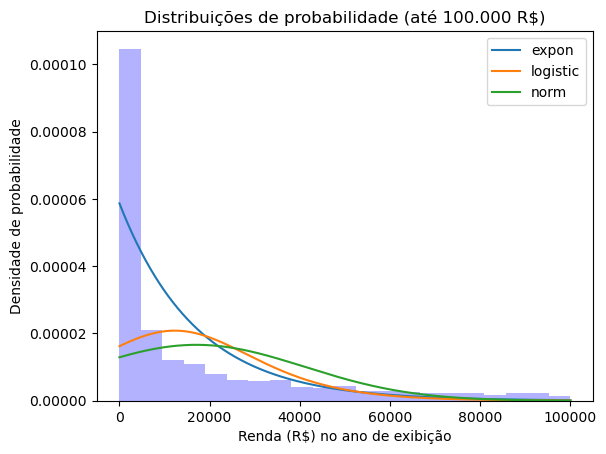

In [36]:
plt.figure()

y = filmes[filmes['Renda (R$) no ano de exibição']<=100000]['Renda (R$) no ano de exibição'].values
x = np.linspace(min(y), max(y), 100000)

h = plt.hist(y, density=True,bins=21,alpha=0.3, color='b')

dist_names = ['expon', 'logistic', 'norm']
for dist_name in dist_names:
  dist = getattr(scipy.stats, dist_name)
  params = dist.fit(y)
  arg = params[:-2]
  loc = params[-2]
  scale = params[-1]
  if arg:
    pdf_fitted = dist.pdf(x, *arg, loc=loc, scale=scale)
  else:
    pdf_fitted = dist.pdf(x, loc=loc, scale=scale)
  plt.plot(pdf_fitted, label=dist_name)

plt.title('Distribuições de probabilidade (até 100.000 R$)')
plt.xlabel('Renda (R$) no ano de exibição')
plt.ylabel('Densidade de probabilidade')
plt.legend(loc= 'upper right')
plt.show()

* Percebemos que a maioria dos filmes tinham renda baixa e o gráfico possui uma distribuição exponencial.

## **Covariância**

In [37]:
filmes[['Público no ano de exibição','Renda (R$) no ano de exibição']].cov()

Público no ano de exibição  \
Público no ano de exibição                   1.086311e+12   
Renda (R$) no ano de exibição                1.615933e+13   

                               Renda (R$) no ano de exibição  
Público no ano de exibição                      1.615933e+13  
Renda (R$) no ano de exibição                   2.444046e+14

## **Correlação**

In [38]:
filmes[['Público no ano de exibição','Renda (R$) no ano de exibição']].corr()

Público no ano de exibição  \
Público no ano de exibição                       1.000000   
Renda (R$) no ano de exibição                    0.991726   

                               Renda (R$) no ano de exibição  
Público no ano de exibição                          0.991726  
Renda (R$) no ano de exibição                       1.000000

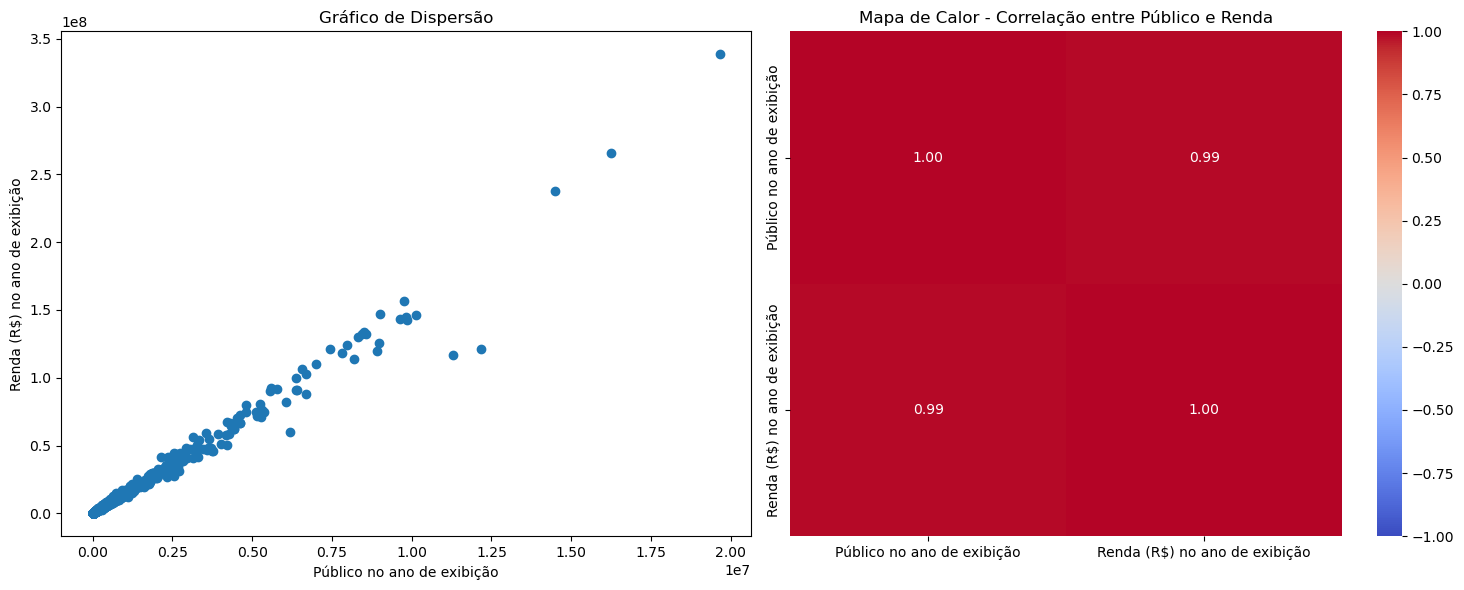

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].scatter(filmes['Público no ano de exibição'], filmes['Renda (R$) no ano de exibição'])
axes[0].set_xlabel('Público no ano de exibição')
axes[0].set_ylabel('Renda (R$) no ano de exibição')
axes[0].set_title('Gráfico de Dispersão')

correlacao = filmes[['Público no ano de exibição', 'Renda (R$) no ano de exibição']].corr()

# heatmap
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, ax=axes[1])

axes[1].set_title('Mapa de Calor - Correlação entre Público e Renda')

# Ajustar layout
plt.tight_layout()

plt.show()

De acordo com o gráfico de dispesão e o mapa de calor, observamos que as 2 variáveis possuem correlação quase de 100%, provavelmente devido à, enquanto o público aumenta, consequentemente a renda aumenta também.

## **Tratamento dos Dados**

In [40]:
filmes.head()

Ano de exibição              Título da obra    Gênero  \
0             2019   120 Batimentos Por Minuto    Ficção   
1             2019                     3 Faces    Ficção   
2             2019            45 Dias Sem Você    Ficção   
3             2019    A 100 Passos De Um Sonho    Ficção   
4             2019  A Abelhinha Maya - O Filme  Animação   

  País(es) produtor(es) da obra Nacionalidade da obra Empresa distribuidora  \
0                        França           Estrangeira             Imovision   
1                           Irã           Estrangeira             Imovision   
2                        Brasil            Brasileira               O2 Play   
3                Estados Unidos           Estrangeira                Disney   
4                      Alemanha           Estrangeira              Playarte   

  Origem da empresa distribuidora  Público no ano de exibição  \
0           Distribuição Nacional                        10.0   
1           Distribuição Nacional                      6289.0   
2           Distribuição Nacional                      3303.0   
3      Distribuição Internacional                        69.0   
4           Distribuição Nacional                       402.0   

   Renda (R$) no ano de exibição  
0                           70.0  
1                       103805.0  
2                        31295.0  
3                         4186.0  
4                         3531.0

In [41]:
nacionalidade = pd.get_dummies(filmes['Nacionalidade da obra'], drop_first=True, dtype=int)
nacionalidade

Estrangeira
0               1
1               1
2               0
3               1
4               1
...           ...
3643            1
3644            0
3645            0
3646            1
3647            0

[3648 rows x 1 columns]

In [42]:
filmes['Empresa distribuidora'].value_counts()

Empresa distribuidora
Imovision                    327
Vitrine Filmes               248
Paris                        194
Disney                       150
Warner                       142
                            ... 
Santa Luzia Filmes             1
Erika Fromm                    1
Dm Filmes                      1
Muk Produções/Enkapothado      1
Espaço Filmes/Videofilmes      1
Name: count, Length: 252, dtype: int64

## **Normalização dos Dados**

Devido à alta assimetria dos dados de renda à direita, utilizaremos um limite de **R$100.000,00** para tornar a distribuição mais legível. Além disso, como a variável do público possui essa assimetria e é altamente correlacionada, também apresentará uma distribuição mais clara.

In [43]:
normalizacao1 = filmes[filmes['Renda (R$) no ano de exibição']<=100000]
normalizacao1[['Público no ano de exibição', 'Renda (R$) no ano de exibição']].describe()

Público no ano de exibição  Renda (R$) no ano de exibição
count                 2231.000000                    2231.000000
mean                  1361.970865                   17048.081242
std                   1866.720413                   24016.374138
min                      0.000000                       0.000000
25%                     96.000000                     850.400000
50%                    454.000000                    4808.000000
75%                   2003.000000                   24342.355000
max                  16132.000000                   99950.000000

* Observamos a diferença nas escalas do público no ano de exibição e renda, logo precisamos normalizar essas 2 variáveis.

* Usaremos essas duas variáveis na normalização das escalas por serem contínuas e ideais para **StandarScaler e MinMaxScaler**.

In [44]:
scaler1 = StandardScaler()
ajuste1=scaler1.fit(normalizacao1[['Renda (R$) no ano de exibição']])
normal1 = scaler1.transform(normalizacao1[['Renda (R$) no ano de exibição']])

normalpadrao1 = pd.DataFrame(normal1, columns=['Renda(R$)-StandardScaler'])

scaler2 = MinMaxScaler()
ajuste2 = scaler2.fit(normalizacao1[['Renda (R$) no ano de exibição']])
normal2 = scaler2.transform(normalizacao1[['Renda (R$) no ano de exibição']])

normalpadrao2 = pd.DataFrame(normal2, columns=['Renda(R$)-MinMaxScaler'])

In [45]:
scaler3 = StandardScaler()
ajuste3=scaler3.fit(normalizacao1[['Público no ano de exibição']])
normal3 = scaler3.transform(normalizacao1[['Público no ano de exibição']])

normalpadrao3 = pd.DataFrame(normal3, columns=['Público-StandardScaler'])

scaler4 = MinMaxScaler()
ajuste4 = scaler4.fit(normalizacao1[['Público no ano de exibição']])
normal4 = scaler4.transform(normalizacao1[['Público no ano de exibição']])

normalpadrao4 = pd.DataFrame(normal4, columns=['Público-MinMaxScaler'])

In [46]:
pd.concat([normalpadrao1.describe(), normalpadrao2.describe(),normalpadrao3.describe(),normalpadrao4.describe()], axis=1)

Renda(R$)-StandardScaler  Renda(R$)-MinMaxScaler  \
count              2.231000e+03             2231.000000   
mean              -3.184862e-18                0.170566   
std                1.000224e+00                0.240284   
min               -7.100116e-01                0.000000   
25%               -6.745944e-01                0.008508   
50%               -5.097699e-01                0.048104   
75%                3.037889e-01                0.243545   
max                3.452665e+00                1.000000   

       Público-StandardScaler  Público-MinMaxScaler  
count            2.231000e+03           2231.000000  
mean            -2.388647e-17              0.084427  
std              1.000224e+00              0.115715  
min             -7.297698e-01              0.000000  
25%             -6.783312e-01              0.005951  
50%             -4.865080e-01              0.028143  
75%              3.434756e-01              0.124163  
max              7.914062e+00              1.000000

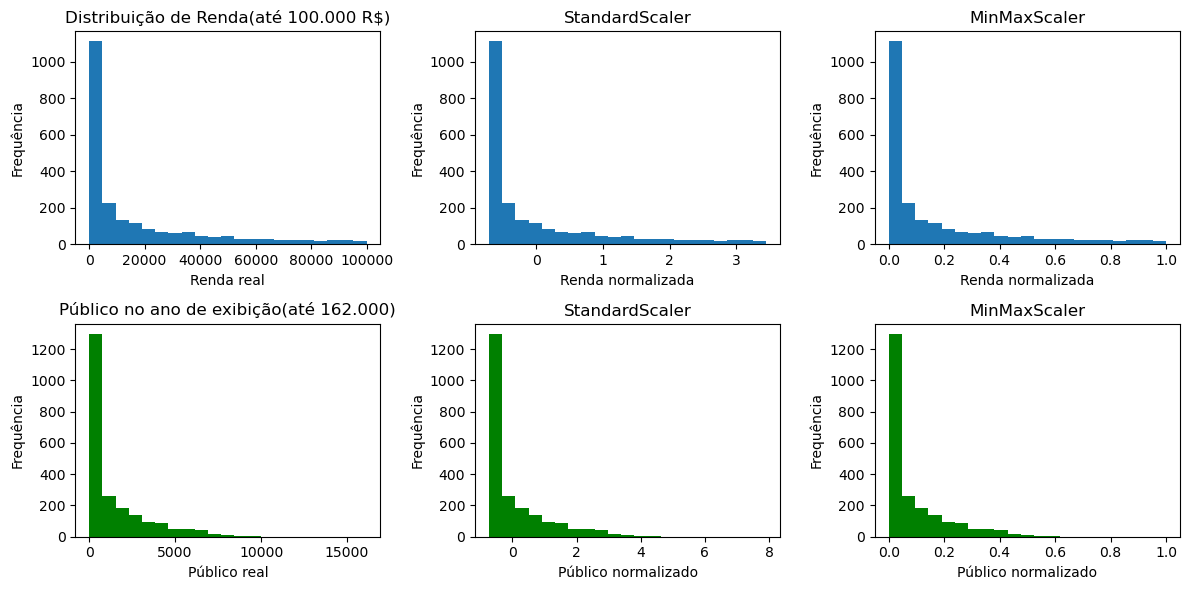

Mediana da Distribuição de Renda(até 100.000 R$): 4808.0
Mediana do Público no ano de exibição(até 162.000): 454.0


In [47]:
fig, axs = plt.subplots(2,3,figsize=(12,6))

normalizacao1['Renda (R$) no ano de exibição'].plot(kind='hist', bins=21, ax=axs[0, 0],
                                                    ylabel='Frequência', xlabel='Renda real',
                                                    title='Distribuição de Renda(até 100.000 R$)')


normalpadrao1['Renda(R$)-StandardScaler'].plot(kind='hist', bins=21, ax=axs[0, 1],
                                                    ylabel='Frequência', xlabel='Renda normalizada',
                                                    title='StandardScaler')

normalpadrao2['Renda(R$)-MinMaxScaler'].plot(kind='hist', bins=21,ax=axs[0,2],
                                                    ylabel='Frequência', xlabel='Renda normalizada',
                                                    title='MinMaxScaler')

normalizacao1['Público no ano de exibição'].plot(kind='hist', bins=21, color='g',ax=axs[1,0],
                                                 ylabel='Frequência',xlabel='Público real',
                                                 title='Público no ano de exibição(até 162.000)')

normalpadrao3['Público-StandardScaler'].plot(kind='hist', bins=21, color='g', ax=axs[1,1], xlabel='Público normalizado', ylabel='Frequência',
                                                 title='StandardScaler')

normalpadrao4['Público-MinMaxScaler'].plot(kind='hist', bins=21, color='g', ax=axs[1,2], xlabel='Público normalizado',ylabel='Frequência',
                                                 title='MinMaxScaler')

plt.tight_layout()


plt.show()

print(f"Mediana da Distribuição de Renda(até 100.000 R$): {normalizacao1['Renda (R$) no ano de exibição'].median()}")
print(f"Mediana do Público no ano de exibição(até 162.000): {normalizacao1['Público no ano de exibição'].median()}")

* Após as normalizações pudemos observar que a distribuição das duas variáveis usadas não mudam.

# **Estatística Descritiva**

In [48]:
filmes['Público no ano de exibição'].describe()

count    3.648000e+03
mean     2.403642e+05
std      1.042262e+06
min      0.000000e+00
25%      2.477500e+02
50%      2.747000e+03
75%      2.791625e+04
max      1.965647e+07
Name: Público no ano de exibição, dtype: float64

Devido à presença de dados discrepantes na distribuição da renda e do público nos anos de exibição, e considerando que ambas as variáveis possuem uma distribuição exponencial, filtramos os valores para um limite de até 100.000 reais de renda ou 100.000 pessoas de público. Esse filtro nos permite focar na parte mais densa dos gráficos, proporcionando análises mais claras, ricas e informativas.

In [49]:
fig = px.box(
    filmes,
    x='Público no ano de exibição',
    color_discrete_sequence=['#636EFA'],  
    title="Distribuição do Público no Ano de Exibição",
    labels={'Público no ano de exibição': 'Público (milhares)'}
)

fig.update_layout(
    title=dict(font=dict(size=20), x=0.5),  
    xaxis_title="Público no Ano de Exibição",
    yaxis_title="Frequência",
    font=dict(size=14),
    template="plotly_white"  
)


fig.show()

print(f"Existe {len(filmes)} filmes.")

Existe 3648 filmes.


In [50]:
fig = px.box(filmes[filmes['Público no ano de exibição']<=100000], 
    x='Público no ano de exibição',
    color_discrete_sequence=['#636EFA'],  
    title="Distribuição do Público no Ano de Exibição(até 100.000)",
    labels={'Público no ano de exibição': 'Público (milhares)'}
)


fig.update_layout(
    title=dict(font=dict(size=20), x=0.5),  
    xaxis_title="Público no Ano de Exibição",
    yaxis_title="Frequência",
    font=dict(size=14),
    template="plotly_white"  
)

fig.show()

print(f"Existe {len(filmes[filmes['Público no ano de exibição']<=100000])} filmes com público abaixo de 100.000.")

Existe 3038 filmes com público abaixo de 100.000.


In [51]:
filmes['Renda (R$) no ano de exibição'].describe()

count    3.648000e+03
mean     3.534919e+06
std      1.563345e+07
min      0.000000e+00
25%      2.666250e+03
50%      3.492119e+04
75%      4.302305e+05
max      3.386249e+08
Name: Renda (R$) no ano de exibição, dtype: float64

In [52]:
fig2 = px.box(filmes[filmes['Renda (R$) no ano de exibição']<=100000],
     x='Renda (R$) no ano de exibição',
     color_discrete_sequence=['#636EFA'],
     title="Distribuição da Renda no Ano de Exibição(até 100.000 R$)",
     labels={'Renda no ano de exibição': 'Renda (milhares)'}
             )

fig2.update_layout(
    title=dict(font=dict(size=20), x=0.5),
    xaxis_title="Renda no Ano de Exibição",
    yaxis_title="Frequência",
    font=dict(size=14),
    template="plotly_white" 
)
fig2.show()

print(f"Existe {len(filmes[filmes['Renda (R$) no ano de exibição']<=100000])} filmes com renda abaixo de 100.000.")

Existe 2231 filmes com renda abaixo de 100.000.


In [53]:
fig3 = px.box(filmes, x='Gênero', y='Público no ano de exibição',
             color_discrete_sequence=['#636EFA'],
             title="Público no Ano de Exibição x Gênero",
             labels={'Público no ano de exibição': 'Público (milhares)'})

fig3.update_layout(
    title=dict(font=dict(size=20), x=0.5),
    yaxis_title="Público no Ano de Exibição",
    font=dict(size=14),
    template="plotly_white" 
)

fig3.show()

In [54]:
fig3 = px.box(filmes[filmes['Público no ano de exibição']<=100000],
              x='Gênero', y='Público no ano de exibição',
              color_discrete_sequence=['#636EFA'],
              title="Público no Ano de Exibição(até 100.000) x Gênero",
              labels={'Público no ano de exibição': 'Público (milhares)'})

fig3.update_layout(
    title=dict(font=dict(size=20), x=0.5),
    yaxis_title="Público no Ano de Exibição",
    font=dict(size=14),
    template="plotly_white"
)
fig3.show()

In [55]:
fig4 = px.box(filmes, x='Gênero', y='Renda (R$) no ano de exibição',
             color_discrete_sequence=['#636EFA'],
             title="Renda no Ano de Exibição x Gênero",
             labels={'Renda no ano de exibição': 'Renda (milhares)'})

fig4.update_layout(
    title=dict(font=dict(size=20), x=0.5),
    yaxis_title="Renda no Ano de Exibição",
    font=dict(size=14),
    template="plotly_white"
)

fig4.show()

In [56]:
filmes['Gênero'].value_counts()

Gênero
Ficção          2803
Documentário     537
Animação         276
Videomusical      32
Name: count, dtype: int64

In [57]:
fig4 = px.box(filmes[filmes['Renda (R$) no ano de exibição']<=100000],
              x='Gênero', y='Renda (R$) no ano de exibição',
              color_discrete_sequence=['#636EFA'],
              title="Renda no Ano de Exibição(até 100.000 R$) x Gênero",
              labels={'Renda no ano de exibição': 'Renda (milhares)'})
fig4.update_layout(
    title=dict(font=dict(size=20), x=0.5),
    yaxis_title="Renda no Ano de Exibição",
    font=dict(size=14),
    template="plotly_white"
)
fig4.show()

In [58]:
fig5 = px.histogram(
    filmes[filmes['Renda (R$) no ano de exibição'] <= 100000],
    x='Gênero',
    color='Gênero',  
    title="Distribuição de Gêneros para Filmes com Renda ≤ R$100.000",
    labels={'Gênero': 'Gênero dos Filmes'},
    color_discrete_sequence=px.colors.qualitative.Plotly  
)

fig5.update_layout(
    title=dict(font=dict(size=20), x=0.5),  
    xaxis_title="Gêneros",
    yaxis_title="Quantidade de Filmes",
    font=dict(size=14),
    template="plotly_white",  
    bargap=0.2  
)


fig5.show()

warnings.filterwarnings("ignore", message=".*length-1 tuple.*")

/home/hugo/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



* Embora o gênero **Videomusical** tenha uma quantidade menor de filmes, nenhum deles registrou uma renda de 0,00 reais, e sua mediana é a mais alta entre os três gêneros. É importante continuar monitorando os filmes desse gênero para verificar se a distribuição da renda permanece elevada.

* Os gêneros **Animação e Documentário** apresentam alta variação nos dados, mesmo com uma quantidade reduzida de filmes, sendo que a maior parte dessa variação ocorre acima da mediana. Em contraste, o gênero **Ficção**, que representa mais de 50% dos filmes, apresenta uma variação semelhante, indicando que o padrão de distribuição para esse gênero provavelmente se mantém no intervalo entre 0 e 27.000 reais.

* Diferentemente da renda, a distribuição do público no ano de exibição para os gêneros **Videomusical, Documentário e Animação** permanece praticamente constante, com valores abaixo de 10.000 pessoas. Já o gênero **Ficção** apresenta maior variação, com público entre 0 e 10.500 pessoas. Será necessário acompanhar para verificar se as distribuições dos três gêneros permanecem baixas ao longo do tempo.

* A distribuição da renda(até 100.000 reais) tem uma maior variação na distribuição em relação ao público(até 100.000 pessoas). Talvez seja pelo fato de alguns filmes terem preço médio dos ingressos maiores devido à regiões diferentes no Brasil, o formato do filme(IMAX ou 3D), permanecer em cartaz por períodos mais longos, campanhas de marketing ou diferença no número de salas.

In [59]:
filmes[(filmes['Renda (R$) no ano de exibição']<=100000)].describe(include='O')['Gênero']

count       2231
unique         4
top       Ficção
freq        1553
Name: Gênero, dtype: object

In [60]:
filmes[(filmes['Renda (R$) no ano de exibição']<=100000)]['Gênero'].value_counts()

Gênero
Ficção          1553
Documentário     487
Animação         162
Videomusical      29
Name: count, dtype: int64

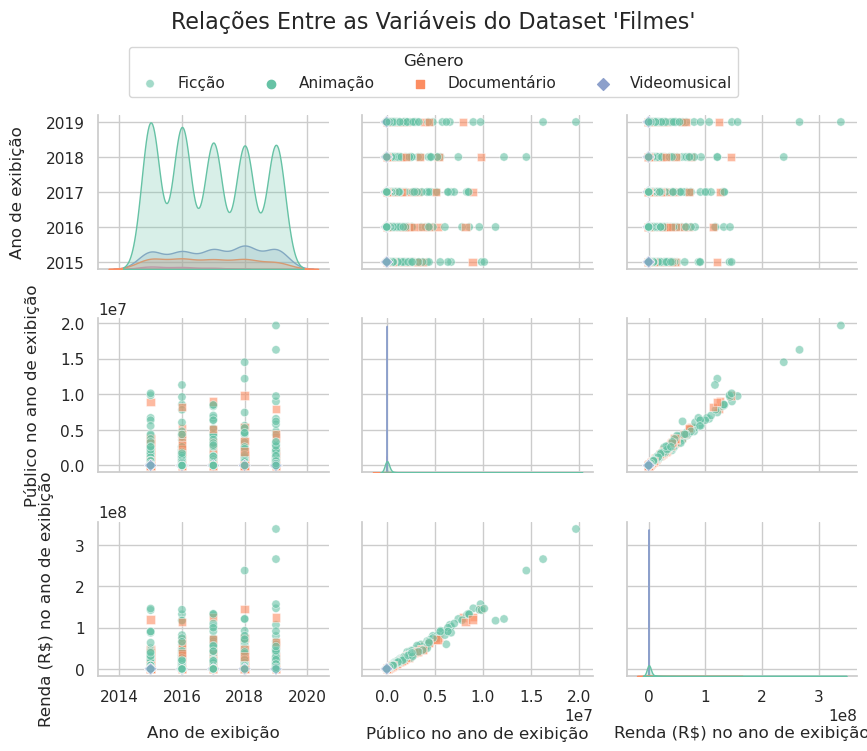

In [61]:
# Ignorando warnings específicos do Seaborn
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn.axisgrid")
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")
warnings.filterwarnings("ignore", category=UserWarning, message="The figure layout has changed to tight")

# Tratando valores infinitos
filmes.replace([float('inf'), float('-inf')], float('nan'), inplace=True)


sns.set_theme(style="whitegrid")


unique_categories = filmes['Gênero'].nunique()
markers = ["o", "s", "D", "X", "^", "v", "*"][:unique_categories]


pairplot = sns.pairplot(
    filmes, 
    hue="Gênero", 
    palette="Set2", 
    diag_kind="kde", 
    markers=markers,
    plot_kws={'alpha': 0.6},
    diag_kws={'fill': True}  
)


pairplot._legend.remove()

pairplot.fig.legend(
    labels=filmes['Gênero'].unique(),
    loc='upper center',          
    bbox_to_anchor=(0.5, 0.98),  
    ncol=unique_categories,      
    title="Gênero"
)

for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), labelpad=15)  
    ax.set_ylabel(ax.get_ylabel(), labelpad=15)  

pairplot.fig.suptitle("Relações Entre as Variáveis do Dataset 'Filmes'", y=1.02, fontsize=16)
plt.tight_layout(pad=2)  

plt.show()

* Nesse gráfico pairplot observamos a alta correlação de quase 100% entre público no ano de exibição e renda no ano de exibição, provavelmente devido a dependência do público para se ter uma renda alta.

* Percebemos dados discrepantes elevados em relação ao público e renda no ano de exibição em 2019 no gênero Ficção.

* Observamos também a inexistência de dados discrepantes no gênero Videomusical, talvez devido a pouca quantidade de filmes.

# **Distribuição Amostral**

Vamos analisar a distribuição das médias das amostras extraídas da população de gêneros de filmes, à medida que a quantidade de elementos das amostras aumenta progressivamente.

* Categorizaremos cada gênero em números para possibilitar os cálculos das médias de cada amostra.

In [62]:
filmes['Gênero_2'] = ''

for i, obj in enumerate(filmes['Gênero']):
  if obj == 'Ficção':
    filmes.at[i, 'Gênero_2'] = 1
  elif obj == 'Documentário':
    filmes.at[i, 'Gênero_2'] = 2
  elif obj == 'Animação':
    filmes.at[i, 'Gênero_2'] = 3
  else:
    filmes.at[i, 'Gênero_2'] = 4

filmes['Gênero_2'] = filmes['Gênero_2'].astype('float')

A média da distribuição real baseada nas amostras é: 1.324341


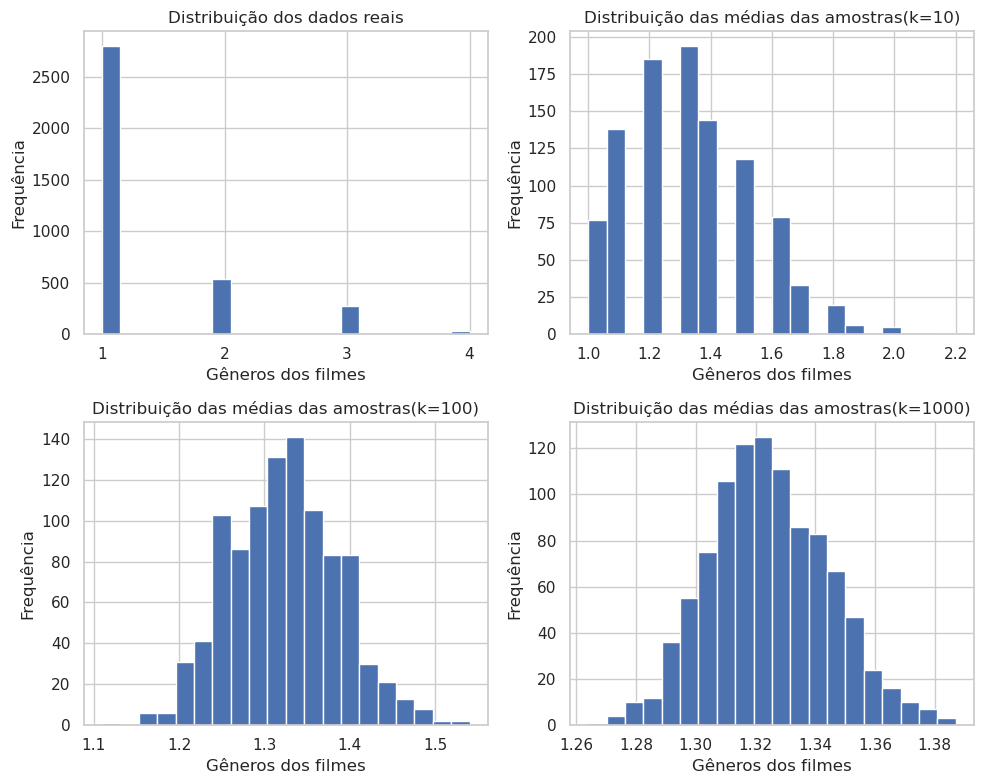

In [63]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Primeiro gráfico: Distribuição dos dados reais
axs[0, 0].hist(filmes['Gênero_2'], bins=20)
axs[0, 0].set_xlabel('Gêneros dos filmes')
axs[0, 0].set_ylabel('Frequência')
axs[0, 0].set_title('Distribuição dos dados reais')
axs[0, 0].xaxis.set_major_locator(MaxNLocator(integer=True))

# Segundo gráfico: Distribuição das médias das amostras (k=10)
means1 = pd.Series([mean(random.choices(filmes['Gênero_2'], k=10)) for _ in range(1000)])
axs[0, 1].hist(means1, bins=20)
axs[0, 1].set_xlabel('Gêneros dos filmes')
axs[0, 1].set_ylabel('Frequência')
axs[0, 1].set_title('Distribuição das médias das amostras(k=10)')

# Terceiro gráfico: Distribuição das médias das amostras (k=100)
means2 = pd.Series([mean(random.choices(filmes['Gênero_2'], k=100)) for _ in range(1000)])
axs[1, 0].hist(means2, bins=20)
axs[1, 0].set_xlabel('Gêneros dos filmes')
axs[1, 0].set_ylabel('Frequência')
axs[1, 0].set_title('Distribuição das médias das amostras(k=100)')

# Quarto gráfico: Distribuição das médias das amostras (k=1000)
means3 = pd.Series([mean(random.choices(filmes['Gênero_2'], k=1000)) for _ in range(1000)])
axs[1, 1].hist(means3, bins=20)
axs[1, 1].set_xlabel('Gêneros dos filmes')
axs[1, 1].set_ylabel('Frequência')
axs[1, 1].set_title('Distribuição das médias das amostras(k=1000)')

print(f"A média da distribuição real baseada nas amostras é: {mean(means3)}")

plt.tight_layout()
plt.show()

Após a construção dos gráficos de distribuição das médias das amostras com 10, 100 e 1000 elementos, observamos que as distribuições tendem a se aproximar de uma distribuição normal. Essa tendência ocorre independentemente da distribuição original dos dados, devido ao Teorema Central do Limite, que afirma que, à medida que o tamanho da amostra aumenta, a distribuição das médias das amostras se aproxima de uma distribuição normal, mesmo que a população original não seja normalmente distribuída. Isso se torna mais evidente à medida que o número de elementos nas amostras aumenta, como demonstrado pelos gráficos com amostras de 100 e 1000 elementos.

* obs: À medida que o tamanho das amostras aumenta, a distribuição das médias das amostras se torna mais concentrada em torno da média populacional((1+2+3+4)/4 = **2.5**), com uma variabilidade menor.

# **Intervalo de confiança**

A variável escolhida para cálculo de intervalo de confiança foi a variável discreta **Gênero** com 100 elementos em cada 1000 amostra.

In [64]:
means2

0      1.39
1      1.35
2      1.29
3      1.38
4      1.19
       ... 
995    1.36
996    1.35
997    1.11
998    1.37
999    1.25
Length: 1000, dtype: float64

In [65]:
n = len(means2)
media_amostral = np.mean(means2)
desvio_padrao_amostral = np.std(means2, ddof=1)

In [66]:
conf_90 = 0.90
conf_95 = 0.95

In [67]:
# Intervalo de confiança de 90%
z_90 = scipy.stats.norm.ppf(1 - (1 - conf_90) / 2)  # Valor crítico Z para 90%
erro_padrao = desvio_padrao_amostral / np.sqrt(n)  # Erro padrão da média
ic_90_inferior = media_amostral - z_90 * erro_padrao
ic_90_superior = media_amostral + z_90 * erro_padrao

# Intervalo de confiança de 95%
z_95 = scipy.stats.norm.ppf(1 - (1 - conf_95) / 2)  # Valor crítico Z para 95%
ic_95_inferior = media_amostral - z_95 * erro_padrao
ic_95_superior = media_amostral + z_95 * erro_padrao

Média real: 1.3248


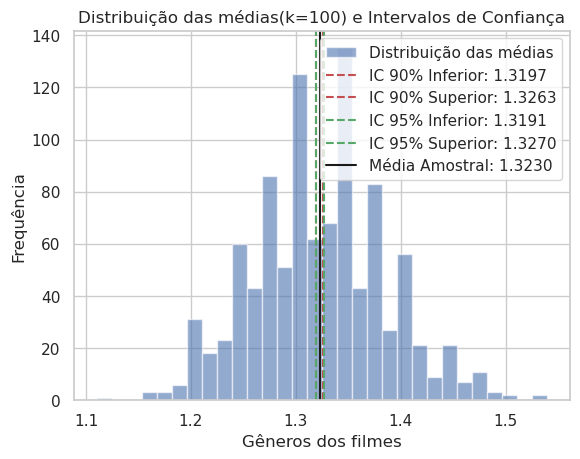

Intervalo de confiança de 90%: (1.3197, 1.3263)
Eu tenho 90% de confiança de que a média de todos os gêneros está entre: (1.3197, 1.3263)
Intervalo de confiança de 95%: (1.3191, 1.3270)
Eu tenho 95% de confiança de que a média de todos os gêneros está entre: (1.3191, 1.3270)


In [68]:
print(f"Média real: {filmes['Gênero_2'].mean():.4f}")

# Gráfico da distribuição das médias
plt.hist(means2, bins=30, alpha=0.6, color='b', label='Distribuição das médias')

# Adicionando os intervalos de confiança no gráfico
plt.axvline(x=ic_90_inferior, color='r', linestyle='--', label=f'IC 90% Inferior: {ic_90_inferior:.4f}')
plt.axvline(x=ic_90_superior, color='r', linestyle='--', label=f'IC 90% Superior: {ic_90_superior:.4f}')
plt.axvline(x=ic_95_inferior, color='g', linestyle='--', label=f'IC 95% Inferior: {ic_95_inferior:.4f}')
plt.axvline(x=ic_95_superior, color='g', linestyle='--', label=f'IC 95% Superior: {ic_95_superior:.4f}')
plt.axvline(x=media_amostral, color='k', linestyle='-', label=f'Média Amostral: {media_amostral:.4f}')

plt.xlabel('Gêneros dos filmes')
plt.ylabel('Frequência')
plt.title('Distribuição das médias(k=100) e Intervalos de Confiança')
plt.legend()

plt.show()

print(f"Intervalo de confiança de 90%: ({ic_90_inferior:.4f}, {ic_90_superior:.4f})")
print(f"Eu tenho 90% de confiança de que a média de todos os gêneros está entre: ({ic_90_inferior:.4f}, {ic_90_superior:.4f})")
print(f"Intervalo de confiança de 95%: ({ic_95_inferior:.4f}, {ic_95_superior:.4f})")
print(f"Eu tenho 95% de confiança de que a média de todos os gêneros está entre: ({ic_95_inferior:.4f}, {ic_95_superior:.4f})")

Intervalos de confiança calculados com várias amostras e 100 elementos cada.

* A média das médias das amostras converge para a média real dos dados, demonstrando que as amostras são representativas da população.

* O erro amostral diminui à medida que aumentamos o tamanho das amostras. Com 100 elementos por amostra, já é possível obter uma estimativa precisa da média real, evidenciada pela concentração da distribuição das médias amostrais em torno desse valor.

* O gráfico confirma que os intervalos de confiança de 90% e 95% incluem corretamente a média real dos dados, validando a confiabilidade dos cálculos estatísticos realizados.

# **Teste de hipótese**

A variável selecionada para o teste de hipótese é a variável discreta 'Gênero', composta por 100 elementos em cada uma das 1.000 amostras analisadas. De acordo com o histograma, a distribuição é normal e iremos testar se a média real é 1,31, valor que será utilizado como hipótese nula. O teste será conduzido com um nível de significância de 0,05, adotado como critério para rejeição ou aceitação da hipótese nula.

In [193]:
# Ho -> 1.31
# H1 # 1.31
amostras = pd.Series((random.choices(means2, k=30)))

In [194]:
print(f"Usaremos {len(amostras)} amostras para o Teste de Hipótese.")
print(f"As amostras possui média {round(mean(amostras),2)} e o desvio padrão é {round(np.std(amostras),2)}")

Usaremos 30 amostras para o Teste de Hipótese.
As amostras possui média 1.33 e o desvio padrão é 0.06


In [195]:
# Nível de significância = 0,05
# Graus de liberdade = 30-1= 29

media_hip_nula = 1.31 
media_amostra = round(mean(amostras),2)
desvp_amostra = round(np.std(amostras),2)
n = 30

T = round((media_amostra - media_hip_nula)/(desvp_amostra/n**0.5),3)
print(T)

1.826


In [196]:
if T > 2.045 or T < -2.045:
    print("Rejeitamos a Hipótese Nula")
else:
    print("Não Rejeitamos a Hipótese Nula")

Não Rejeitamos a Hipótese Nula


In [197]:
valor_p = 2 * (1 - scipy.stats.t.cdf(abs(T), df=n-1))
print(f"Valor p: {round(valor_p, 4)}")

Valor p: 0.0782


In [198]:
if valor_p < 0.05:
    print("Rejeitamos a Hipótese Nula (valor p < 0.05)")
else:
    print("Não Rejeitamos a Hipótese Nula (valor p >= 0.05)")

Não Rejeitamos a Hipótese Nula (valor p >= 0.05)


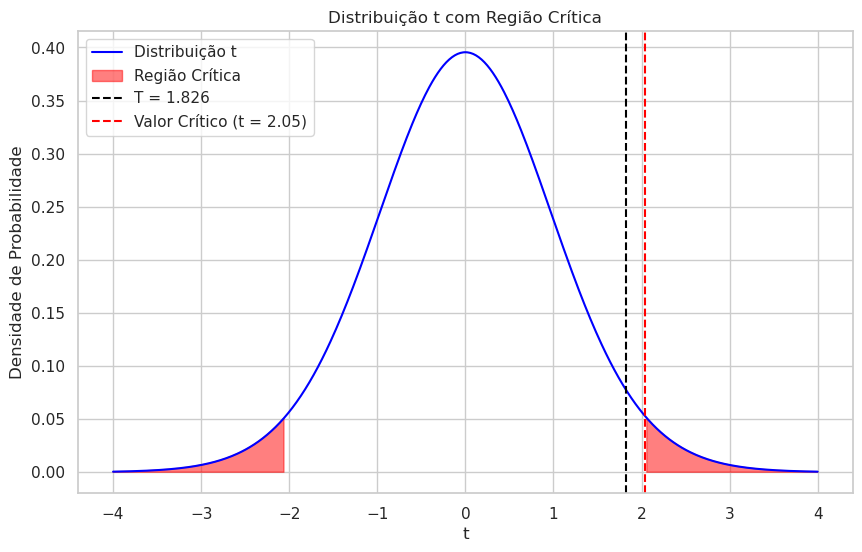

Não Rejeitamos a Hipótese Nula (T não está contido na região crítica).


In [199]:
media_hip_nula = 1.31
media_amostra = round(mean(amostras), 2)
desvp_amostra = round(np.std(amostras), 2)
n = 30

# Calculando o valor t
T = round((media_amostra - media_hip_nula) / (desvp_amostra / np.sqrt(n)), 3)

# Graus de liberdade
df = n - 1

alpha = 0.05
t_critical = scipy.stats.t.ppf(1 - alpha/2, df)

x = np.linspace(-4, 4, 500)
y = scipy.stats.t.pdf(x, df)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Distribuição t", color="blue")

plt.fill_between(x, y, where=(x > t_critical) | (x < -t_critical), color='red', alpha=0.5, label="Região Crítica")

plt.axvline(T, color='black', linestyle='--', label=f"T = {T}")

plt.axvline(t_critical, color='red', linestyle='--', label=f"Valor Crítico (t = {t_critical:.2f})")

plt.title("Distribuição t com Região Crítica")
plt.xlabel("t")
plt.ylabel("Densidade de Probabilidade")
plt.legend()

plt.show()

if T > 2.045 or T < -2.045:
    print("Rejeitamos a Hipótese Nula (T está contido na região crítica).")
else:
    print("Não Rejeitamos a Hipótese Nula (T não está contido na região crítica).")

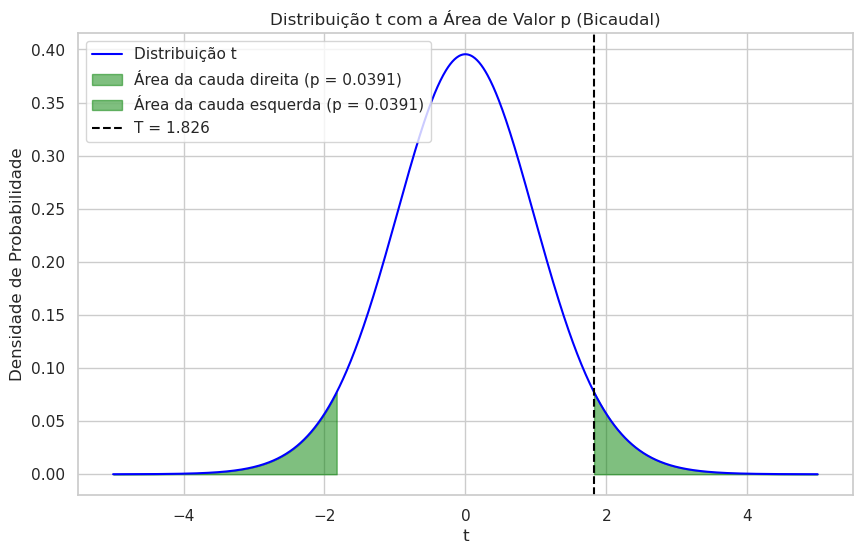

Não Rejeitamos a Hipótese Nula (valor p >= 0.05)
valor-p é igual a 0.08.


In [203]:
df = 29    # Graus de liberdade
alpha = 0.05  # Nível de significância

# Calculando o valor-p (para teste bicaudal)
valor_p = 2 * (1 - scipy.stats.t.cdf(abs(T), df=df))

x = np.linspace(-5, 5, 1000)
y = scipy.stats.t.pdf(x, df)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Distribuição t", color="blue")

plt.fill_between(x, y, where=(x > T), color='green', alpha=0.5, label=f"Área da cauda direita (p = {round(valor_p/2, 4)})")
plt.fill_between(x, y, where=(x < -T), color='green', alpha=0.5, label=f"Área da cauda esquerda (p = {round(valor_p/2, 4)})")

plt.axvline(T, color='black', linestyle='--', label=f"T = {T}")

plt.title("Distribuição t com a Área de Valor p (Bicaudal)")
plt.xlabel("t")
plt.ylabel("Densidade de Probabilidade")
plt.legend()

plt.show()

# Teste de hipótese
if valor_p < alpha:
    print("Rejeitamos a Hipótese Nula (valor p < 0.05)")
else:
    print("Não Rejeitamos a Hipótese Nula (valor p >= 0.05)")
    
print(f"valor-p é igual a {round(valor_p,2)}.")

De acordo com os dois gráficos, o T normal não está contido na região crítica e o valor-p é maior que o teste de significância(0,08 >= 0,05), então **Não Rejeitamos a Hipótese Nula**.